# MVP Análise de Dados e Boas Práticas

**Nome:** Ursula Machado Weinstein

**Matrícula:** 4052025000257

**Dataset:** [Social Media vs Productivity](https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity/data)

<img src="https://raw.githubusercontent.com/ursula2025/analise-de-dados/master/dataset-social_media.jpg" width="300">

# Descrição do Problema

O conjunto de dados Social Media vs Productividade é um conjunto de dados comportamentais realistas que explora os hábitos digitais diários de 30.000 usuários - incluindo uso de mídia social, tempo de tela e exposição a notificações - e relaciona-os com a produtividade individual, estresse e bem-estar.
O objetivo dessa análise é investigar a relação entre o tempo de uso de mídias sociais e a possível discrepância entre a produtividade autopercebida e a produtividade real.

## Hipóteses do Problema

Com base no problema descrito, tracei as hipóteses iniciais para guiar a análise exploratória dos dados:

- Quanto mais tempo uma pessoa passa nas redes sociais, menor é a nota que ela dá para a sua própria produtividade?

- Quanto mais tempo nas redes sociais, menor a produtividade real e mensurável da pessoa?

- Existe uma correlação positiva entre a produtividade autoavaliada e a produtividade real?

## Tipo de Problema

Este é um problema de regressão supervisionado. Dado um conjunto de características (como uso de mídia social, tempo de tela, exposição a notificações...), o objetivo principal é prever a produtividade real de um indivíduo.

## Fonte de Dados

Para este estudo, foi utilizado o conjunto de dados público 'Social Media vs Productivity', obtido a partir da plataforma de ciência de dados Kaggle. Este dataset é composto por informações sobre os hábitos digitais, bem-estar e métricas de produtividade de aproximadamente 30.000 indivíduos.

A escolha deste conjunto de dados se deu por sua riqueza de variáveis, que permitem investigar de forma abrangente as hipóteses levantadas sobre a relação entre o comportamento digital e a performance profissional.

## Atributos do Dataset

- ***IDADE***: Idade do indivíduo (18–65 anos)

- ***GÊNERO***: Identidade de gênero: Masculino, Feminino ou Outro.

- ***TIPO_EMPREGO_STATUS***: Setor ou status de emprego (TI, Educação, etc.).

- ***TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL***: Tempo médio diário gasto nas redes sociais (horas).

- ***REDE_SOCIAL_PREFERÊNCIA***: Plataforma social mais utilizada (Instagram, TikTok, etc.).

- ***NÚMERO_NOTIFICAÇÕES***: Número de notificações móveis/sociais por dia.

- ***HORAS_TRABALHADAS_DIA***: Média de horas trabalhadas por dia.

- ***PONT_PRODUT_AUTOAVALIADA***: Pontuação de produtividade autoavaliada (escala: 0–10).

- ***PONT_PRODUT_REAL***: Pontuação de produtividade real (escala: 0–10).

- ***NÍVEL_STRESS***: Nível de estresse atual (escala: 1–10).

- ***HORAS_SONO***: Média de horas de sono por noite.

- ***HORAS_TELA_ANTES_DORMIR***: Tempo gasto em telas antes de dormir (horas).

- ***PAUSA_DURANTE_TRABALHO***: Número de pausas feitas durante o horário de trabalho.

- ***APP_FOCO***: Se o usuário usa aplicativos de foco digital (Verdadeiro/Falso).

- ***BEM_ESTAR_DIGITAL***: Se o Bem-estar Digital está ativado (Verdadeiro/Falso).

- ***CONSUMO_DIÁRIO_CAFÉ***: Número de xícaras de café consumidas por dia.

- ***DIAS_BURNOUT***: Número de dias de burnout relatados por mês.

- ***HORAS_OFFLINE***: Total de horas offline por semana (excluindo sono).

- ***SATISFAÇÃO_TRABALHO_VIDA***: Satisfação com trabalho/vida (escala: 0–10).

# Importação das Bibliotecas Necessárias e Carga de Dados

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math

In [ ]:
# Carregando o dataset
caminho_arquivo = 'https://raw.githubusercontent.com/ursula2025/' \
'analise-de-dados/refs/heads/main/social_media_vs_productivity.csv'
social_media = pd.read_csv(caminho_arquivo) #, names=labels_atributos)

# renomeando labels dos atributos do dataset
labels_atributos = ['IDADE', 'GÊNERO', 'TIPO_EMPREGO_STATUS',
'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL',
'REDE_SOCIAL_PREFERÊNCIA', 'NÚMERO_NOTIFICAÇÕES', 'HORAS_TRABALHADAS_DIA',
'PONT_PRODUT_AUTOAVALIADA', 'PONT_PRODUT_REAL', 'NÍVEL_STRESS', 'HORAS_SONO',
'HORAS_TELA_ANTES_DORMIR','PAUSA_DURANTE_TRABALHO', 'APP_FOCO',
'BEM_ESTAR_DIGITAL', 'CONSUMO_DIÁRIO_CAFÉ', 'DIAS_BURNOUT', 'HORAS_OFFLINE',
'SATISFAÇÃO_TRABALHO_VIDA']

social_media.columns = labels_atributos

In [ ]:
# Verificando que social_media é um dataframe
type(social_media)

pandas.core.frame.DataFrame

In [ ]:
# Exibindo as primeiras linhas
social_media.head()

,IDADE,GÊNERO,TIPO_EMPREGO_STATUS,TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL,REDE_SOCIAL_PREFERÊNCIA,NÚMERO_NOTIFICAÇÕES,HORAS_TRABALHADAS_DIA,PONT_PRODUT_AUTOAVALIADA,PONT_PRODUT_REAL,NÍVEL_STRESS,HORAS_SONO,HORAS_TELA_ANTES_DORMIR,PAUSA_DURANTE_TRABALHO,APP_FOCO,BEM_ESTAR_DIGITAL,CONSUMO_DIÁRIO_CAFÉ,DIAS_BURNOUT,HORAS_OFFLINE,SATISFAÇÃO_TRABALHO_VIDA
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [ ]:
# Exibindo as últimas linhas
social_media.tail()

,IDADE,GÊNERO,TIPO_EMPREGO_STATUS,TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL,REDE_SOCIAL_PREFERÊNCIA,NÚMERO_NOTIFICAÇÕES,HORAS_TRABALHADAS_DIA,PONT_PRODUT_AUTOAVALIADA,PONT_PRODUT_REAL,NÍVEL_STRESS,HORAS_SONO,HORAS_TELA_ANTES_DORMIR,PAUSA_DURANTE_TRABALHO,APP_FOCO,BEM_ESTAR_DIGITAL,CONSUMO_DIÁRIO_CAFÉ,DIAS_BURNOUT,HORAS_OFFLINE,SATISFAÇÃO_TRABALHO_VIDA
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711
29999,44,Male,Unemployed,NaN,Twitter,70,8.069883,6.311227,5.402726,3.0,6.765248,0.993090,5,False,True,1,4,6.324954,7.388790


# Análise Exploratória de Dados

Esta etapa analisa o dataset social_media para explorar a relação entre o uso de mídias sociais e a produtividade.

Iniciaremos com uma visão geral do Total e Tipo das Instâncias, seguida pelas Estatísticas Descritivas para obter uma visão aprofundada dos dados, identificar padrões iniciais e preparar as próximas fases da análise.

## Análise Estrutural dos Dados

### Total e Tipo das Instâncias

O dataset **social_media** possui 30000 instâncias e 19 atributos. Uma análise inicial dos tipos de dados revela que, dentre esses atributos:

-_14 são do tipo numérico, sendo 5 do tipo int64 e 9 do tipo float64;_  
-_3 são categóricos, do tipo object;_  
-_2 são booleanos, do tipo bool (representando True ou False)._

In [ ]:
# Verificando os tipos de cada coluna do dataframe
social_media.dtypes

,0
IDADE,int64
GÊNERO,object
TIPO_EMPREGO_STATUS,object
TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL,float64
REDE_SOCIAL_PREFERÊNCIA,object
NÚMERO_NOTIFICAÇÕES,int64
HORAS_TRABALHADAS_DIA,float64
PONT_PRODUT_AUTOAVALIADA,float64
PONT_PRODUT_REAL,float64
NÍVEL_STRESS,float64


### Estatísticas Descritivas

A análise de estatísticas descritivas é um passo fundamental para a compreensão inicial de um conjunto de dados.

Nesta etapa serão investigados os atributos numéricos com medidas como: mínimo, máximo, mediana, moda, média, desvio-padrão e quartis, além de identificar a presença de valores ausentes (NaNs).

Essa visão panorâmica é crucial para identificar padrões, avaliar a qualidade dos dados e orientar as próximas fases da análise sobre o impacto do uso de mídias sociais na produtividade.

In [ ]:
# Estatísticas descritivas básicas do dataset
social_media.describe()

,IDADE,TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL,NÚMERO_NOTIFICAÇÕES,HORAS_TRABALHADAS_DIA,PONT_PRODUT_AUTOAVALIADA,PONT_PRODUT_REAL,NÍVEL_STRESS,HORAS_SONO,HORAS_TELA_ANTES_DORMIR,PAUSA_DURANTE_TRABALHO,CONSUMO_DIÁRIO_CAFÉ,DIAS_BURNOUT,HORAS_OFFLINE,SATISFAÇÃO_TRABALHO_VIDA
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


In [ ]:
# Verificando se as colunas possum valores NaN
print(f"Total de instâncias: {len(social_media)}")
print("\n\033[1mTipos de dados por coluna:\033[0m")
print(social_media.info())

Total de instâncias: 30000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IDADE                         30000 non-null  int64  
 1   GÊNERO                        30000 non-null  object 
 2   TIPO_EMPREGO_STATUS           30000 non-null  object 
 3   TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL  27235 non-null  float64
 4   REDE_SOCIAL_PREFERÊNCIA       30000 non-null  object 
 5   NÚMERO_NOTIFICAÇÕES           30000 non-null  int64  
 6   HORAS_TRABALHADAS_DIA         30000 non-null  float64
 7   PONT_PRODUT_AUTOAVALIADA      28386 non-null  float64
 8   PONT_PRODUT_REAL              27635 non-null  float64
 9   NÍVEL_STRESS                  28096 non-null  float64
 10  HORAS_SONO                    27402 non-null  float64
 11  HORAS_TELA_ANTES_DORMIR       27789 non-null  float64
 12  PAUSA

In [ ]:
# Contando os valores nulos por coluna
nan_por_coluna = social_media.isnull().sum()

print("\033[1mContagem de valores nulos por coluna:\033[0m")
print(nan_por_coluna)
print("-" * 36)

# Encontrando a coluna com o maior número de NaNs
coluna_com_mais_nan = nan_por_coluna.idxmax()

# Encontrando a quantidade de NaNs nessa coluna
quantidade_max_nan = nan_por_coluna.max()

print(f"A coluna com o maior número de valores NaN é: '\033[1m{coluna_com_mais_nan}\033[0m'")
print(f"Com um total de \033[1m{quantidade_max_nan}\033[0m valores NaN.")

Contagem de valores nulos por coluna:
IDADE                              0
GÊNERO                             0
TIPO_EMPREGO_STATUS                0
TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL    2765
REDE_SOCIAL_PREFERÊNCIA            0
NÚMERO_NOTIFICAÇÕES                0
HORAS_TRABALHADAS_DIA              0
PONT_PRODUT_AUTOAVALIADA        1614
PONT_PRODUT_REAL                2365
NÍVEL_STRESS                    1904
HORAS_SONO                      2598
HORAS_TELA_ANTES_DORMIR         2211
PAUSA_DURANTE_TRABALHO             0
APP_FOCO                           0
BEM_ESTAR_DIGITAL                  0
CONSUMO_DIÁRIO_CAFÉ                0
DIAS_BURNOUT                       0
HORAS_OFFLINE                      0
SATISFAÇÃO_TRABALHO_VIDA        2730
dtype: int64
------------------------------------
A coluna com o maior número de valores NaN é: 'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'
Com um total de 2765 valores NaN.


O dataset social_media, possui sete colunas com valores faltantes, sendo a coluna TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL, a que apresenta maior quantidade.

In [ ]:
# Contando o número de linhas com pelo menos um NaN
num_linhas_com_nan = social_media.isnull().any(axis=1).sum()

total_linhas = len(social_media)

porc_linhas_com_nan = (num_linhas_com_nan / total_linhas) * 100

print(f"Total de linhas no dataset: \033[1m{total_linhas}\033[0m")
print(f"Número de linhas com pelo menos um NaN: \033[1m{num_linhas_com_nan}\033[0m")
print(f"Porcentagem de linhas com pelo menos um NaN: "
      f"\033[1m{porc_linhas_com_nan:.2f}%\033[0m")

Total de linhas no dataset: 30000
Número de linhas com pelo menos um NaN: 12926
Porcentagem de linhas com pelo menos um NaN: 43.09%


O dataset social_media apresenta uma considerável quantidade de dados ausentes, com 43,09% das linhas (cerca de 12.927 registros) possuindo pelo menos um valor NaN. Esta alta taxa de dados faltantes indica a necessidade de uma estratégia de tratamento de NaNs para preservar a integridade do dataset.

In [ ]:
# Identificando quais são as colunas numéricas
numeric_cols = social_media.select_dtypes(include=np.number).columns.tolist()

print("\033[1mResumo Estatísticas Descritivas para Atributos Numéricos\033[0m")

for col in numeric_cols:
    print(f"\n\033[1mVariável: {col}\033[0m")
    stats = social_media[col].describe()

    # Calculando e formatando a moda
    moda_vals = social_media[col].mode()
    if len(moda_vals) == 1:
        moda_str = f"{moda_vals[0]:.2f}"
    elif len(moda_vals) > 1:
        moda_str = f"Múltiplas: {moda_vals.iloc[:3].tolist()}..."
    else:
        moda_str = "N/A (sem moda ou todos únicos)"
    # Fim do cálculo e formatação da moda

    num_nans = social_media[col].isnull().sum()

    # Impressão das Estatísticas
    print(f"  Mínimo: {stats['min']:.2f}")
    print(f"  Máximo: {stats['max']:.2f}")
    print(f"  Mediana: {stats['50%']:.2f}")
    print(f"  Moda: {moda_str}")
    print(f"  Média: {stats['mean']:.2f}")
    print(f"  Desvio Padrão: {stats['std']:.2f}")
    print(f"  Número de Valores Ausentes (NaNs): {num_nans}")
    print("-" * 50)


Resumo Estatísticas Descritivas para Atributos Numéricos

Variável: IDADE
  Mínimo: 18.00
  Máximo: 65.00
  Mediana: 41.00
  Moda: 34.00
  Média: 41.49
  Desvio Padrão: 13.84
  Número de Valores Ausentes (NaNs): 0
--------------------------------------------------

Variável: TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL
  Mínimo: 0.00
  Máximo: 17.97
  Mediana: 3.03
  Moda: 0.00
  Média: 3.11
  Desvio Padrão: 2.07
  Número de Valores Ausentes (NaNs): 2765
--------------------------------------------------

Variável: NÚMERO_NOTIFICAÇÕES
  Mínimo: 30.00
  Máximo: 90.00
  Mediana: 60.00
  Moda: 59.00
  Média: 59.96
  Desvio Padrão: 7.72
  Número de Valores Ausentes (NaNs): 0
--------------------------------------------------

Variável: HORAS_TRABALHADAS_DIA
  Mínimo: 0.00
  Máximo: 12.00
  Mediana: 6.99
  Moda: 12.00
  Média: 6.99
  Desvio Padrão: 2.00
  Número de Valores Ausentes (NaNs): 0
--------------------------------------------------

Variável: PONT_PRODUT_AUTOAVALIADA
  Mínimo: 2.00
  Máximo: 9.00

## Análise Individual das Variáveis

### Análise das Variáveis Numéricas: Histogramas

#### _IDADE_

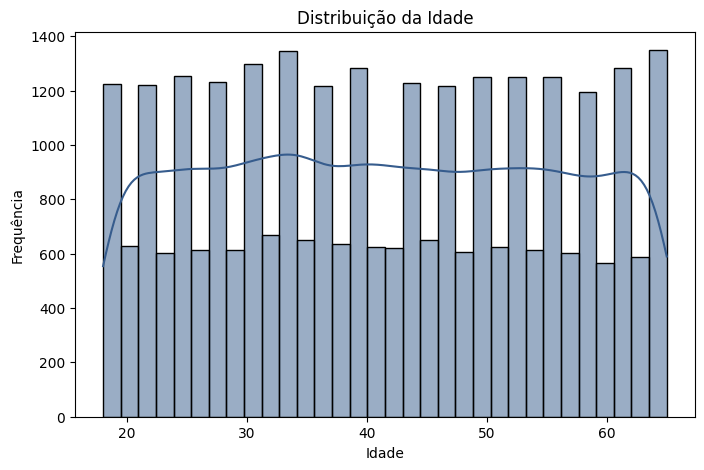

In [65]:
# Verificando a distribuição dos dados na variável IDADE
plt.figure(figsize=(8, 5))
sns.histplot(social_media['IDADE'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição etária dos participantes bastante simétrica, que varia de 18 a 65 anos e visualmente confirma que não há outliers.
A curva de densidade (KDE) reforça a percepção de uma distribuição dispersa e razoavelmente homogênea dentro dessa faixa de idade.

#### _TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL_

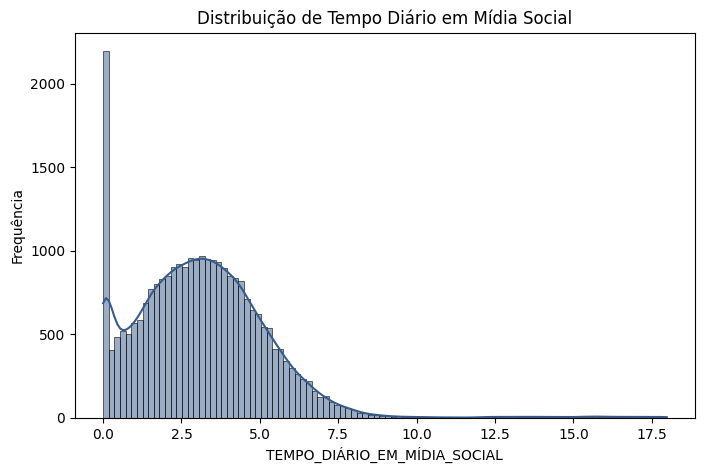

In [ ]:
# Verificando a distribuição dos dados na variável TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL
plt.figure(figsize=(8, 5))
sns.histplot(social_media['TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição de Tempo Diário em Mídia Social')
plt.xlabel('TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição do tempo que os participantes dedicam diariamente às mídias sociais. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal e assimérica à direita, indicando que maioria utiliza as redes sociais por um período de 2,5 a 3,5 horas, mas existe um grupo menor com um tempo de engajamento muito maior, o que pode indicar a presença de outliers.

#### _NÚMERO_NOTIFICAÇÕES_

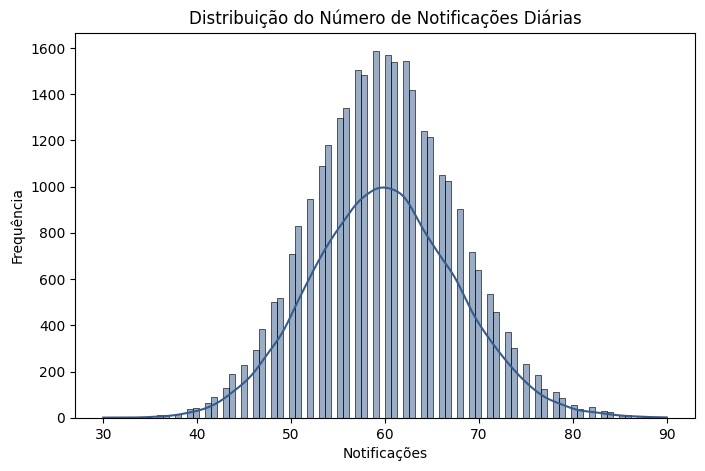

In [ ]:
# Verificando a distribuição dos dados na variável NÚMERO_NOTIFICAÇÕES
plt.figure(figsize=(8, 5))
sns.histplot(social_media['NÚMERO_NOTIFICAÇÕES'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição do Número de Notificações Diárias')
plt.xlabel('Notificações')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição da quantidade de notificações que os participantes recebem por dia. A curva de densidade estimada (KDE) nos indica que a distribuição é simétrica e unimodal, indicando que a maioria dos participantes recebem em torno de 60 notificações.

#### _HORAS_TRABALHADAS_DIA_

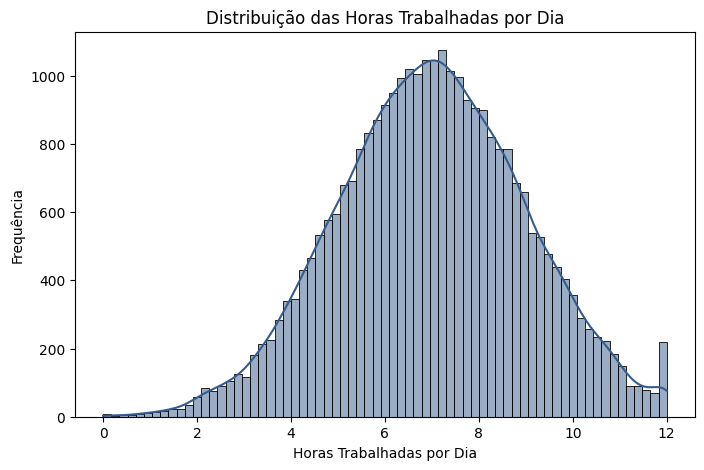

In [ ]:
# Verificando a distribuição dos dados na variável HORAS_TRABALHADAS_DIA
plt.figure(figsize=(8, 5))
sns.histplot(social_media['HORAS_TRABALHADAS_DIA'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição das Horas Trabalhadas por Dia')
plt.xlabel('Horas Trabalhadas por Dia')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição da quantidade da carga horária diária de trabalho dos participantes. A curva de densidade estimada (KDE) nos indica que a distribuição é simétrica e unimodal, indicando que a carga horária da maioria dos participantes fica em torno de 7 horas e mostra também uma concentração significativa de participantes que trabalham 12 horas (ponto de atenção).

#### _PONT_PRODUT_AUTOAVALIADA_

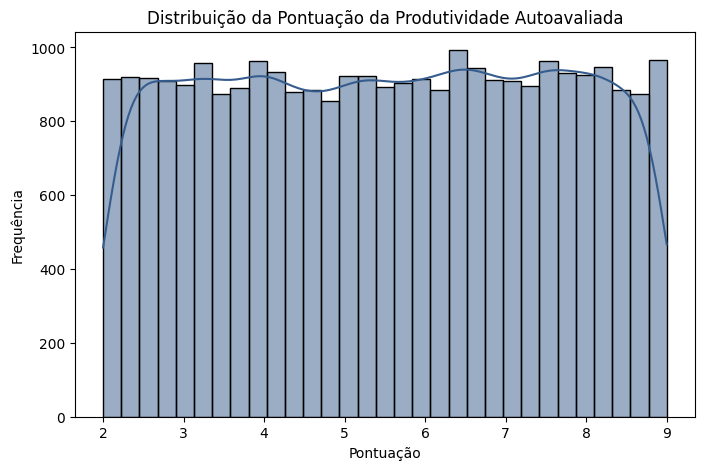

In [ ]:
# Verificando a distribuição dos dados na variável PONT_PRODUT_AUTOAVALIADA
plt.figure(figsize=(8, 5))
sns.histplot(social_media['PONT_PRODUT_AUTOAVALIADA'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição da Pontuação da Produtividade Autoavaliada')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição da Pontuação da Produtividade Autoavaliada. A curva de densidade estimada (KDE) nos indica que a distribuição parece multimodal (possui vários picos), podendo indicar que os diversos usuários percebem de maneiras diferentes a sua produtividade, dentre baixa, média e alta.

#### *PONT_PRODUT_REAL*

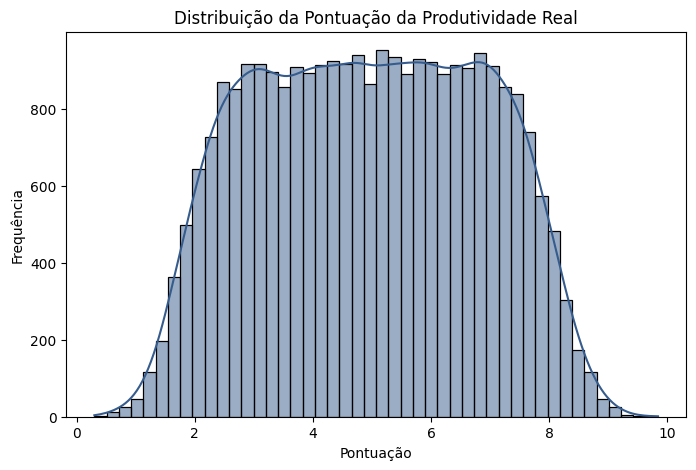

In [ ]:
# Verificando a distribuição dos dados na variável PONT_PRODUT_REAL
plt.figure(figsize=(8, 5))
sns.histplot(social_media['PONT_PRODUT_REAL'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição da Pontuação da Produtividade Real')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição da Pontuação da Produtividade Real. A curva de densidade estimada (KDE) nos indica que a distribuição parece unimodal (possui um pico bem definido), podendo indicar que a produtividade da maioria dos usuários está em torno de um valor médio.

#### _NÍVEL_STRESS_

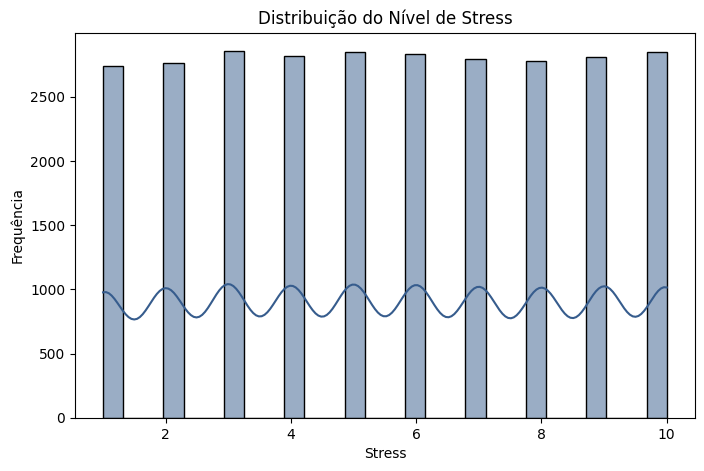

In [ ]:
# Verificando a distribuição dos dados na variável NÍVEL_STRESS
plt.figure(figsize=(8, 5))
sns.histplot(social_media['NÍVEL_STRESS'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição do Nível de Stress')
plt.xlabel('Stress')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição dos níveis de estresse autoavaliados pelos participantes, numa escala que vai de 1 a 10. A curva de densidade estimada (KDE) nos indica que a distribuição é uniforme, podendo indicar que não há um nível de estresse predominante.

#### _HORAS_SONO_

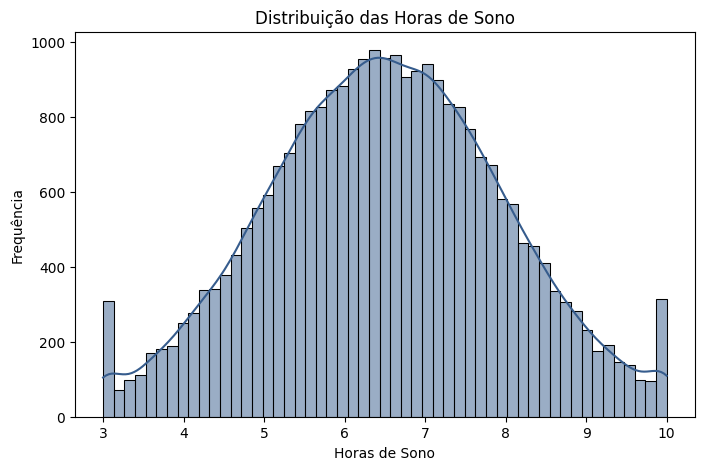

In [ ]:
# Verificando a distribuição dos dados na variável HORAS_SONO
plt.figure(figsize=(8, 5))
sns.histplot(social_media['HORAS_SONO'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição das Horas de Sono')
plt.xlabel('Horas de Sono')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição das horas de sono diárias dos participantes. A curva de densidade estimada (KDE) nos indica que a distribuição é simétrica e unimodal, indicando que a maioria dos participantes dorme em torno de 6,5 a 7 horas e mostra também um pico de concentração significativa de participantes que dormem 3 horas e outro de participantes que dormem 10 horas.

#### _HORAS_TELA_ANTES_DORMIR_

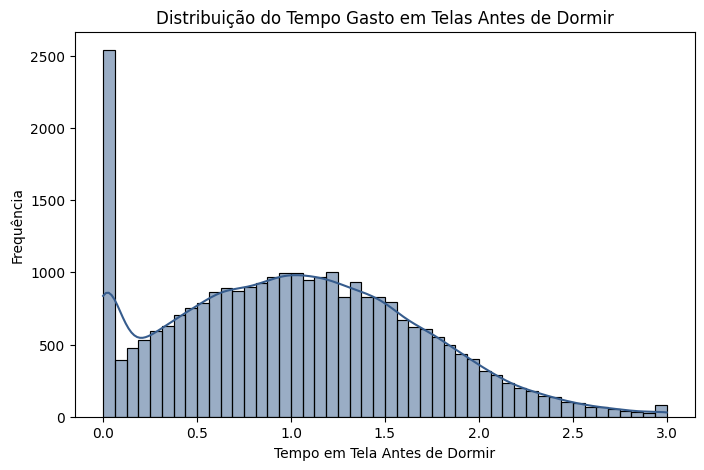

In [ ]:
# Verificando a distribuição dos dados na variável HORAS_TELA_ANTES_DORMIR
plt.figure(figsize=(8, 5))
sns.histplot(social_media['HORAS_TELA_ANTES_DORMIR'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição do Tempo Gasto em Telas Antes de Dormir')
plt.xlabel('Tempo em Tela Antes de Dormir')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição das horas que os participantes utilizam telas antes de dormir. A curva de densidade estimada (KDE) nos indica que a distribuição é assimétrica e bimodal, indicando que a maioria dos participantes não utiliza telas antes de dormir ou utiliza por um tempo bem curto e que a outra parcela dos participantes utiliza telas por um tempo moderado antes de dormir.

#### _PAUSA_DURANTE_TRABALHO_

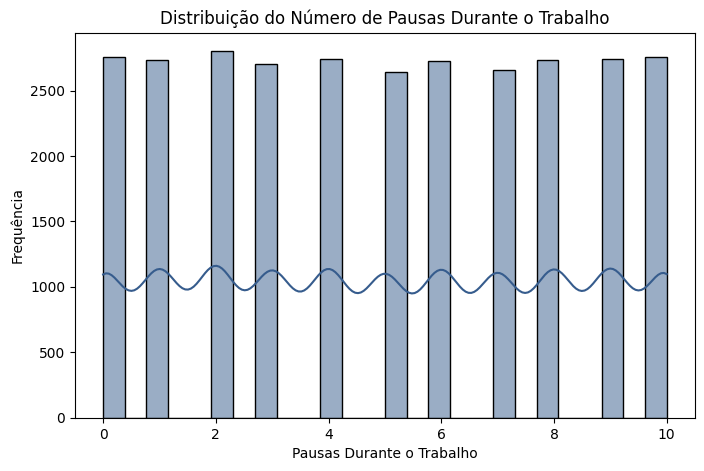

In [ ]:
# Verificando a distribuição dos dados na variável PAUSA_DURANTE_TRABALHO
plt.figure(figsize=(8, 5))
sns.histplot(social_media['PAUSA_DURANTE_TRABALHO'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição do Número de Pausas Durante o Trabalho')
plt.xlabel('Pausas Durante o Trabalho')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição da quantidade de pausas realizadas pelos participantes durante o trabalho. A curva de densidade estimada (KDE) nos indica que a distribuição é uniforme, podendo indicar que não há um padrão dominante de comportamento em relação às pausas.

#### _CONSUMO_DIÁRIO_CAFÉ_

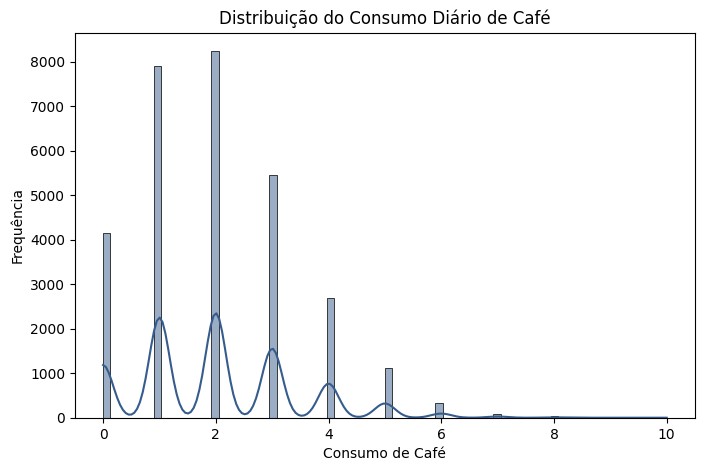

In [ ]:
# Verificando a distribuição dos dados na variável CONSUMO_DIÁRIO_CAFÉ
plt.figure(figsize=(8, 5))
sns.histplot(social_media['CONSUMO_DIÁRIO_CAFÉ'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição do Consumo Diário de Café')
plt.xlabel('Consumo de Café')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição da quantidade de xícaras de café consumidas por dia pelos participantes. A curva de densidade estimada (KDE) nos indica que a distribuição é assimétrica e multimodal, indicando que a maioria dos participantes consumem até 2 xícaras por dia e uma quantidade bem menor consome até 10 xícaras.

#### _DIAS_BURNOUT_

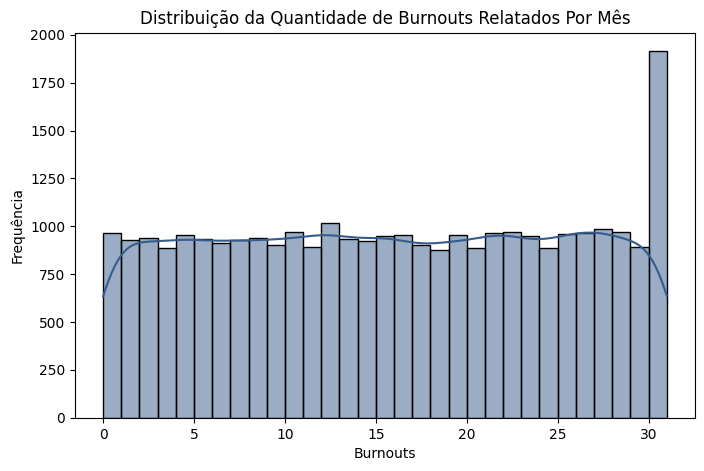

In [ ]:
# Verificando a distribuição dos dados na variável DIAS_BURNOUT
plt.figure(figsize=(8, 5))
sns.histplot(social_media['DIAS_BURNOUT'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição da Quantidade de Burnouts Relatados Por Mês')
plt.xlabel('Burnouts')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição do número de vezes que os participantes relataram burnout em um mês. A curva de densidade estimada (KDE) nos indica que a distribuição é assimétrica e unimodal, indicando que a maioria dos burnouts são reportados com frequências semelhantes e há um pico que indica que uma quantidade muito maior de participantes reportam o número máximo de burnouts no mês.

#### _HORAS_OFFLINE_

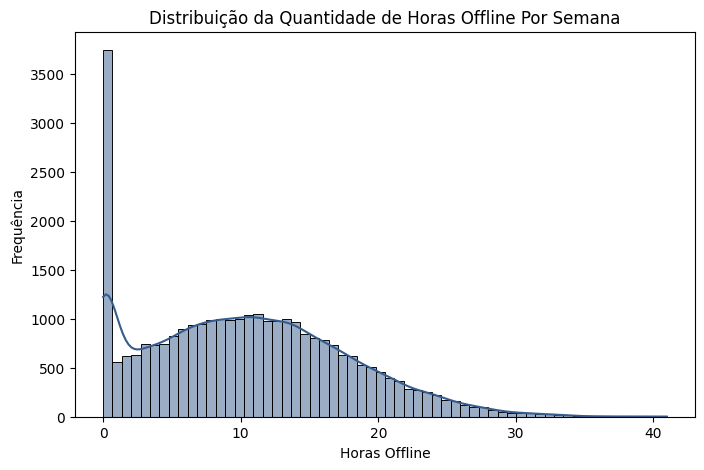

In [ ]:
# Verificando a distribuição dos dados na variável HORAS_OFFLINE
plt.figure(figsize=(8, 5))
sns.histplot(social_media['HORAS_OFFLINE'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição da Quantidade de Horas Offline Por Semana')
plt.xlabel('Horas Offline')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição da quantidade de horas que os participantes passam offline, ou seja, sem uso de telas ou internet por semana. A curva de densidade estimada (KDE) nos indica que a distribuição é assimétrica e bimodal, indicando que um grande número de participantes passa muito pouco ou nenhum tempo sem telas ou internet por semana. Há também um grupo de participantes que ficam offline durante 5 a 15 horas e outro grupo com frequência menor tende a ficar offline por um tempo maior.

#### _SATISFAÇÃO_TRABALHO_VIDA_

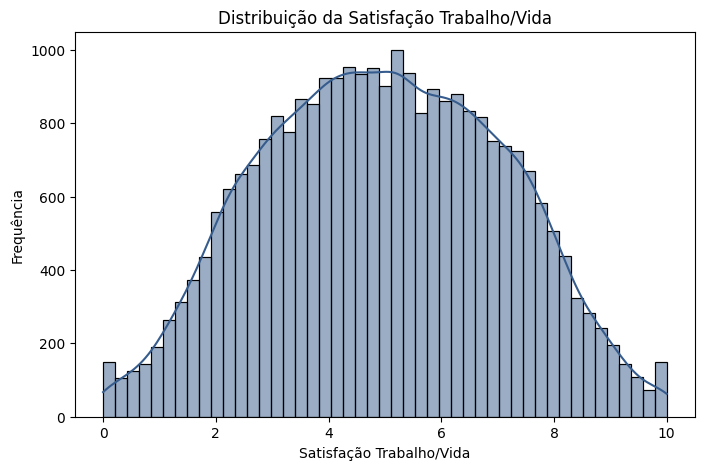

In [ ]:
# Verificando a distribuição dos dados na variável SATISFAÇÃO_TRABALHO_VIDA
plt.figure(figsize=(8, 5))
sns.histplot(social_media['SATISFAÇÃO_TRABALHO_VIDA'], kde=True,
color=sns.color_palette("viridis")[1])
plt.title('Distribuição da Satisfação Trabalho/Vida')
plt.xlabel('Satisfação Trabalho/Vida')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição da quantidade dos níveis de satisfação com o dos participantes, em uma escala que vai de 0 a 10. A curva de densidade estimada (KDE) nos indica que a distribuição é simétrica e unimodal, indicando que a maior parte dos participantes reporta um nível de satisfação médio. Outros grupos de participantes se distribuem pelos diversos níveis de satisfação.

### Análise das Variáveis Categóricas: Gráficos de Barras

#### _GÊNERO_

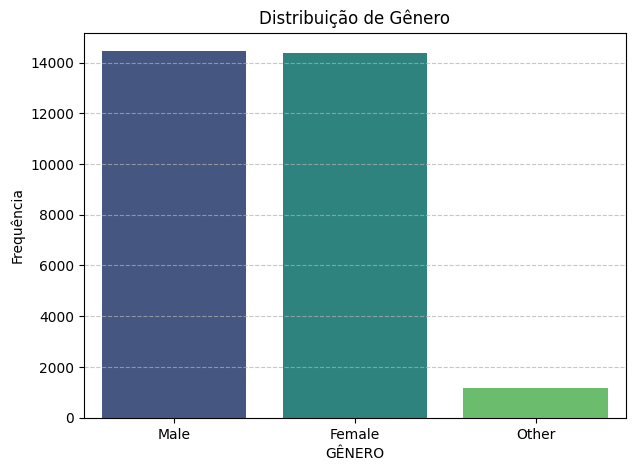

In [ ]:
# Criando o gráfico de barras para a variável 'GÊNERO'
plt.figure(figsize=(7, 5))
sns.countplot(data=social_media, x='GÊNERO', palette='viridis')
plt.title('Distribuição de Gênero')
plt.xlabel('GÊNERO')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

O gráfico de barras exibe a distribuição de gênero no dataset social_media indicando que é equilibrada entre as categorias Male (Masculino) e Female (Feminino). A categoria Other (Outros) aparece em menor quantidade.

#### _TIPO_EMPREGO_STATUS_

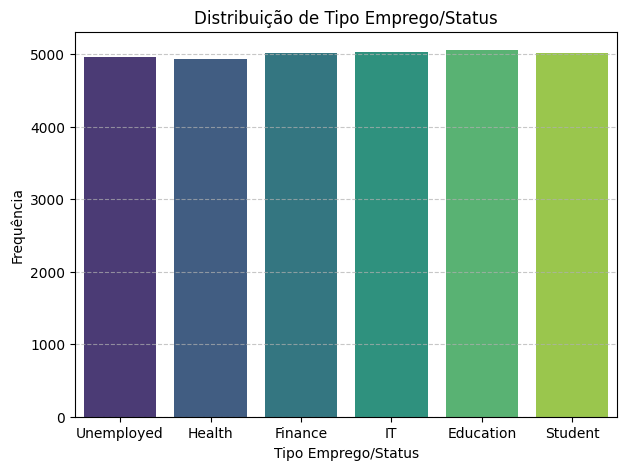

In [ ]:
# Criando o gráfico de barras para a variável 'TIPO_EMPREGO_STATUS'
plt.figure(figsize=(7, 5))
sns.countplot(data=social_media, x='TIPO_EMPREGO_STATUS', palette='viridis')
plt.title('Distribuição de Tipo Emprego/Status')
plt.xlabel('Tipo Emprego/Status')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

O gráfico de barras exibe a distribuição do tipo de emprego bem como status (opção para os participantes escolherem caso estejam desempregados). Essa distribuição é muito equilibrada entre as diferentes categorias de tipo de emprego/status.

#### _REDE_SOCIAL_PREFERÊNCIA_

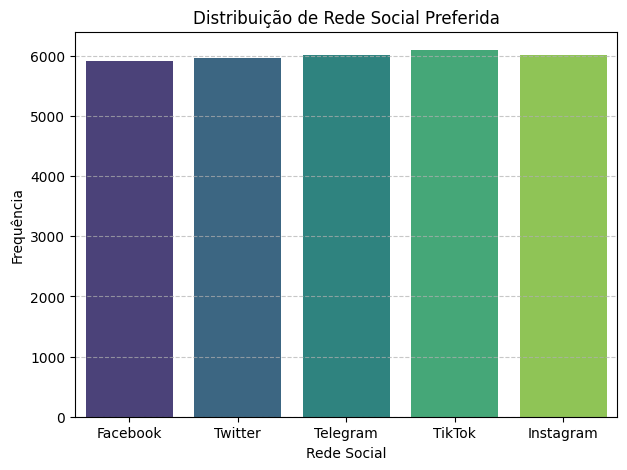

In [ ]:
# Criando o gráfico de barras para a variável 'REDE_SOCIAL_PREFERÊNCIA'
plt.figure(figsize=(7, 5))
sns.countplot(data=social_media, x='REDE_SOCIAL_PREFERÊNCIA', palette='viridis')
plt.title('Distribuição de Rede Social Preferida')
plt.xlabel('Rede Social')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

O gráfico de barras exibe a distribuição da preferência dos participantes entre as 5 opções de redes sociais. Essa distribuição é muito equilibrada indicando que não há uma rede social muito mais popular do que outra.

#### _APP_FOCO_

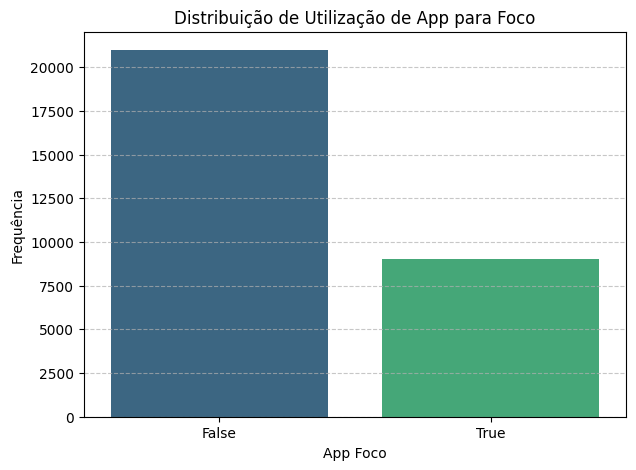

In [ ]:
# Criando o gráfico de barras para a variável 'APP_FOCO'
plt.figure(figsize=(7, 5))
sns.countplot(data=social_media, x='APP_FOCO', palette='viridis')
plt.title('Distribuição de Utilização de App para Foco')
plt.xlabel('App Foco')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

O gráfico de barras exibe a distribuição da utilização ou não de um aplicativo para foco. A variável APP_FOCO é booleana e é representada como True (utiliza App para foco) e False (não utiliza App para foco).  Essa distribuição é desequilibrada indicando que a grande maioria dos participantes não utiliza aplicativo para foco.

#### _BEM_ESTAR_DIGITAL_

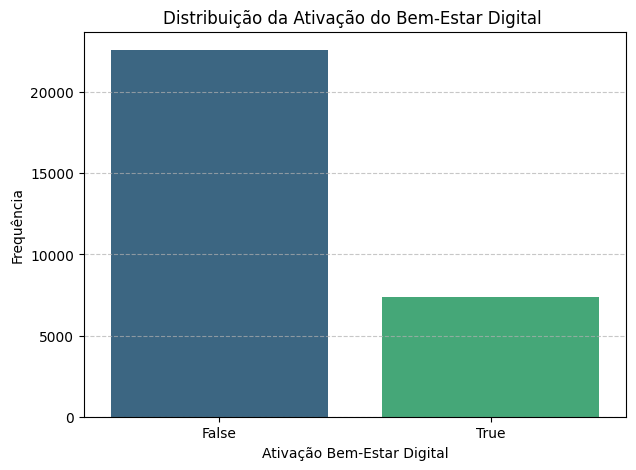

In [ ]:
# Criando o gráfico de barras para a variável 'BEM_ESTAR_DIGITAL'
plt.figure(figsize=(7, 5))
sns.countplot(data=social_media, x='BEM_ESTAR_DIGITAL', palette='viridis')
plt.title('Distribuição da Ativação do Bem-Estar Digital ')
plt.xlabel('Ativação Bem-Estar Digital')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

O gráfico de barras exibe a distribuição da utilização ou não de ferramentas de bem-estar digital. A variável BEM_ESTAR_DIGITAL é booleana e é representada como True (ativação do bem-estar digital) e False (não ativação do bem-estar digital). Essa distribuição é desequilibrada indicando que a grande maioria dos participantes não ativa essas ferramentas.

## Análise entre as Variáveis

### Matriz de Correlação

Após a análise individual de cada variável, investigaremos quantitativamente as relações lineares entre as variáveis centrais que formam as hipóteses do estudo.

Para isso, será gerada uma Matriz de Correlação focada nas variáveis TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL, PONT_PRODUT_AUTOAVALIADA e PONT_PRODUT_REAL. O objetivo é obter um valor numérico (o coeficiente de correlação) que indique a força e a direção da associação entre elas.

In [ ]:
# Selecionando as colunas a serem utilizadas na Matriz de Correlação
colunas_para_correlacao = [
    'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL',
    'PONT_PRODUT_AUTOAVALIADA',
    'PONT_PRODUT_REAL']

# Calculando a Matriz de Correlação
matriz_correlacao = social_media[colunas_para_correlacao].corr()

# Exibindo a Matriz de Correlação numericamente
print("\nMatriz de Correlação:")

# Formatando a saída
matriz_correlacao.style.format("{:.2f}")


Matriz de Correlação:


,TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL,PONT_PRODUT_AUTOAVALIADA,PONT_PRODUT_REAL
TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL,1.00,-0.01,-0.01
PONT_PRODUT_AUTOAVALIADA,-0.01,1.00,0.96
PONT_PRODUT_REAL,-0.01,0.96,1.00


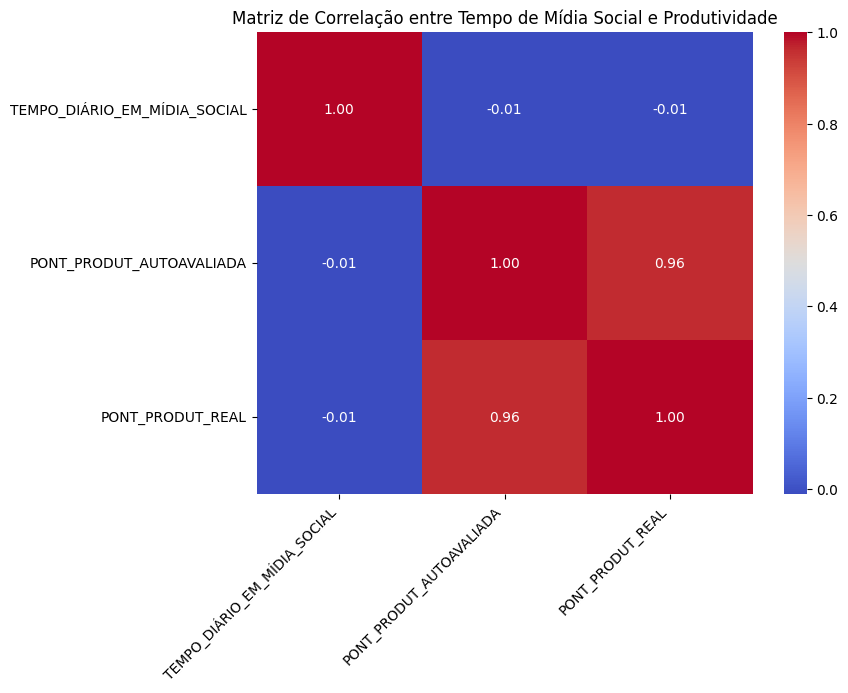

In [ ]:
# Visualizando o mapa de calor das variáveis numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacao,
    annot=True,
    cmap='coolwarm',
    fmt=".2f")
plt.title('Matriz de Correlação entre Tempo de Mídia Social e Produtividade')
plt.xticks(rotation=45, ha='right')
plt.show()

A análise da Matriz de Correlação evidencia que a variavel TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL não tem uma relação linear com as variáveis PONT_PRODUT_AUTOAVALIADA e PONT_PRODUT_REAL. Isso sugere que o movimento de uma variável não permite prever o movimento da outra.
Entre as variáveis PONT_PRODUT_AUTOAVALIADA e PONT_PRODUT_REAL, podemos notar uma correlação linear muito forte e positiva. Isso sugere que à medida que uma variável aumenta, a outra também aumenta de forma proporcional.

### Impacto Visual do Uso de Mídia Social na Produtividade usando Boxplots

A utilização do Bloxplot objetiva entender como a distribuição das duas medidas de produtividade (PONT_PRODUT_AUTOAVALIADA e PONT_PRODUT_REAL) varia em função do tempo de utilização de mídias sociais (TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL).

Como a variável TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL é numérica, precisaremos categorizá-la para que possamos relacioná-la com as outras variáveis.

Antes de prosseguir com o Boxplot precisaremos categorizar a variável TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL. Definiremos 3 categorias para a variação de tempo de utilização de mídia social: Uso Baixo, Uso Moderado e Uso Alto. Respostas com valores zerados serão categorizados em Não Usuário (0h) e os valores NaN, Tempo Mídia Social não Informado.

In [ ]:
# Criando a nova coluna para as categorias, inicialmente com um substituto
# temporário para os NaNs
social_media['CATEGORIA_TEMPO_MIDIA_SOCIAL'] = np.nan

# Definindo a categoria para 'Não Usuário (0h)'
social_media.loc[social_media['TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'] == 0,\
'CATEGORIA_TEMPO_MIDIA_SOCIAL'] = 'Não Usuário (0h)'

# Definindo categorias para os participantes com tempo > 0 e não NaN
# Filtrando apenas os usuários com tempo > 0 e removendo NaNs temporariamente
# para categorizar TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL
social_media_usuarios_nao_zero = social_media[(social_media\
['TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'] > 0) & (social_media\
['TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'].notna())].copy()

# Inicializando a variável que armazenará os limites das categorias
cat_qcut = None

if not social_media_usuarios_nao_zero.empty:
    # Definindo as categorias e rotulando
    num_cat_usuarios = 3
    labels_usuarios = ['Uso Baixo', 'Uso Moderado', 'Uso Alto']

    # Certificando de que o número de quantis é menor ou igual ao número
    # de valores únicos
    if social_media_usuarios_nao_zero['TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'].nunique()\
    >= num_cat_usuarios:
        series_categorias, cat_qcut = pd.qcut\
        (social_media_usuarios_nao_zero['TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'],
            q=num_cat_usuarios,
            labels=labels_usuarios,
            duplicates='drop',
            retbins=True # <--- Adicione este argumento
        )
        social_media_usuarios_nao_zero['TEMP_CAT'] = series_categorias
        # Copiando as categorias  para o dataframe original
        social_media.loc[social_media_usuarios_nao_zero.index,\
        'CATEGORIA_TEMPO_MIDIA_SOCIAL'] = social_media_usuarios_nao_zero\
        ['TEMP_CAT']
    else:
        print('Poucos valores únicos para criar categorias de usuário')

# tratando os valores NaNs
social_media.loc[social_media['TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'].isna(),\
'CATEGORIA_TEMPO_MIDIA_SOCIAL'] = 'Tempo Mídia Social Não Informado'

# Exibindo os limites por categoria
print('Limites dos Intervalos:')

if cat_qcut is not None: # Verifica se os limites foram gerados
    print('\nPara as categorias de Uso (Tempo > 0):')
    for i in range(len(cat_qcut) - 1):
        # Formata para duas casas decimais e mostra o intervalo
        print(f'{labels_usuarios[i]}:\
        ({cat_qcut[i]:.2f}h -{cat_qcut[i+1]:.2f}h)')
else:
    print('Não foi possível determinar os limites\
    utilizados para as categorias')

print('\nOutras Categorias:')
print('Não Usuário (0h): corresponde exatamente a 0 horas')
print('Tempo Mídia Social não Informado: corresponde aos valores NaN (ausentes)')

Limites dos Intervalos:

Para as categorias de Uso (Tempo > 0):
Uso Baixo:        (0.00h -2.39h)
Uso Moderado:        (2.39h -4.02h)
Uso Alto:        (4.02h -17.97h)

Outras Categorias:
Não Usuário (0h): corresponde exatamente a 0 horas
Tempo Mídia Social não Informado: corresponde aos valores NaN (ausentes)


In [ ]:
# Mostrando a coluna criada (CATEGORIA_TEMPO_MIDIA_SOCIAL) e a quantidade de
# registros em cada uma das categorias
print(social_media['CATEGORIA_TEMPO_MIDIA_SOCIAL'].value_counts(dropna=False))

CATEGORIA_TEMPO_MIDIA_SOCIAL
Uso Alto                            8458
Uso Moderado                        8458
Uso Baixo                           8458
Tempo Mídia Social Não Informado    2765
Não Usuário (0h)                    1861
Name: count, dtype: int64


#### _PONT_PRODUT_AUTOAVALIADA por Categorias de Tempo em Mídia Social_

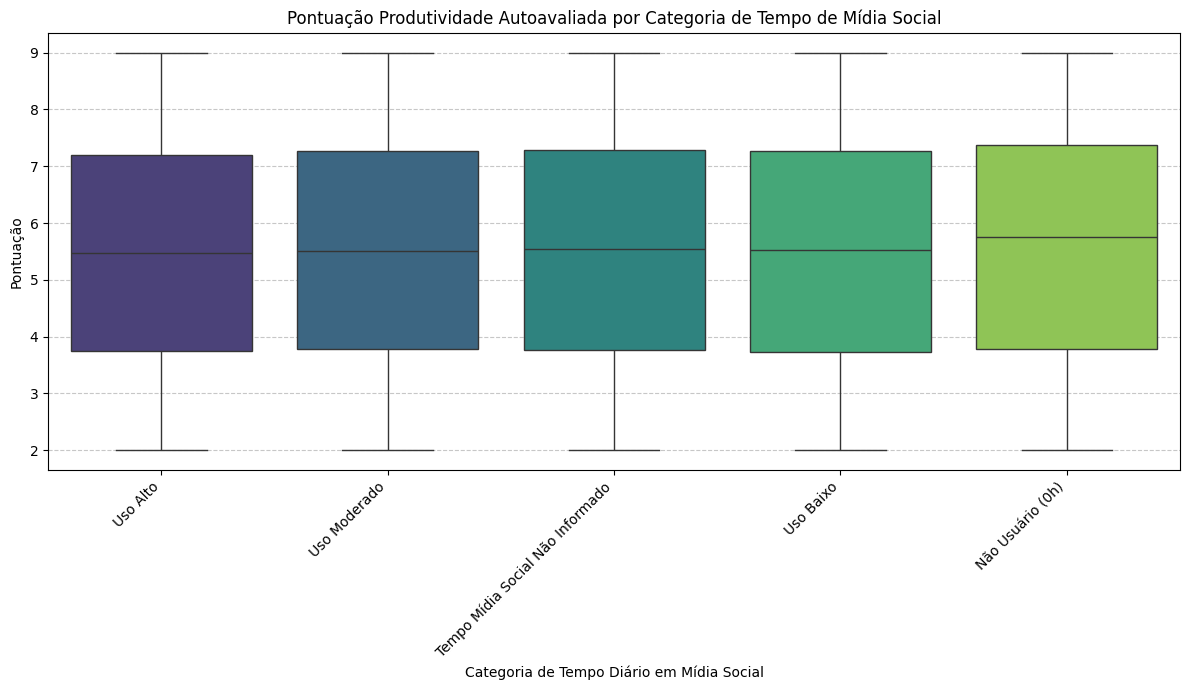

In [ ]:
# Boxplot da Pontuação Autoavaliada por Categorias de Tempo em Mídia Social
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=social_media,
    x='CATEGORIA_TEMPO_MIDIA_SOCIAL',
    y='PONT_PRODUT_AUTOAVALIADA', palette='viridis')
plt.title('Pontuação Produtividade Autoavaliada por '
'Categoria de Tempo de Mídia Social')

plt.xlabel('Categoria de Tempo Diário em Mídia Social')

plt.ylabel('Pontuação')

# Adiciona um grid no eixo Y para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Rotaciona os rótulos do eixo X e ajusta o tamanho da fonte
plt.xticks(rotation=45, ha='right')
# Ajusta o layout para evitar sobreposição de rótulos
plt.tight_layout()
plt.show()

O boxplot da Pontuação de Produtividade Autoavaliada por Categoria de Tempo em Mídia Social demonstra que a percepção de produtividade dos participantes não demonstra variação significativa entre os diferentes níveis de uso de mídia social. Podemos observar isso através das medianas, as quais não variam muito, se agrupando entre 5.5 e 6.0.
Observando a amplitude interquartil e a dispersão dos dados podemos perceber que o nível de uso de mídias sociais (ou a ausência de informação sobre ele) não parece fazer uma diferença perceptível na forma como as pessoas sentem que são produtivas. A percepção de produtividade parece ser um fator mais "independente" em relação a essa variável específica.

#### _PONT_PRODUT_REAL por Categorias de Tempo em Mídia Social_

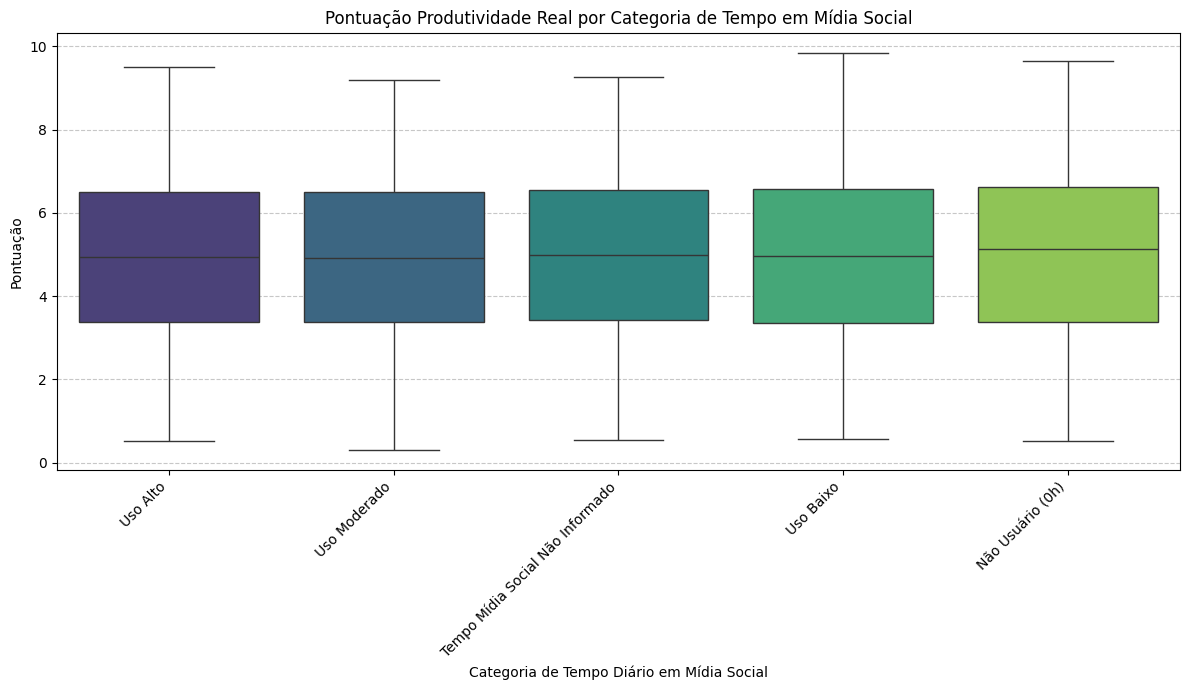

In [ ]:
# Boxplot da Pontuação Produtividade Real por
# Categorias de Tempo em Mídia Social
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=social_media,
    x='CATEGORIA_TEMPO_MIDIA_SOCIAL',
    y='PONT_PRODUT_REAL', palette='viridis')
plt.title('Pontuação Produtividade Real por '
'Categoria de Tempo em Mídia Social')

plt.xlabel('Categoria de Tempo Diário em Mídia Social')

plt.ylabel('Pontuação')

# Adiciona um grid no eixo Y para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Rotaciona os rótulos do eixo X e ajusta o tamanho da fonte
plt.xticks(rotation=45, ha='right')
# Ajusta o layout para evitar sobreposição de rótulos
plt.tight_layout()
plt.show()

O Boxplot da Pontuação Produtividade Real por Categoria de Tempo em Mídia Social demonstra que as distribuições são bastante consistentes em todas as categorias. Podemos observar isso através das medianas, as quais apresentam valores muito semelhantes entre as categorias (5.0 e 5.5). Observando a amplitude interquartil e a dispersão dos dados podemos perceber que a forma como a produtividade real varia nas categorias de tempo é muito parecida. Isso sugere que a variabilidade na produtividade real dos participantes é a mesma, independentemente do tempo que eles dedicam, ou não, às mídias sociais.

## Expandindo a Análise de Correlação para uma Compreensão Mais Abrangente da Produtividade

Inicialmente, nossa análise exploratória de dados focou na relação entre o TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL e as métricas de produtividade, mas a Matriz de Correlação mostrou que a correlação entre TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL e PONT_PRODUT_REAL é de -0.01, ou seja, quase nula, indicando que o tempo gasto em mídias sociais não é um fator forte para prever diretamente as produtividade real e autoavaliada.

Sendo assim, precisaremos expandir a investigação para obtermos uma compreensão mais completa sobre os fatores que influenciam as produtividades.

Antes de prosseguir com a etapa de pré-processamento, faremos uma outra Matriz de Correlação mais abrangente para explorar as relações entre as produtividades e as outras variáveis numéricas.

### Matriz de Correlação Abrangente da Produtividade Real

Para garantir clareza e evitar qualquer problema de visualização, optamos por dividir a matriz de correlação completa em dois subconjuntos de variáveis.

#### Subconjunto 1: IDADE, NÚMERO_NOTIFICAÇÕES, HORAS_TRABALHADAS_DIA,NÍVEL_STRESS, HORAS_SONO

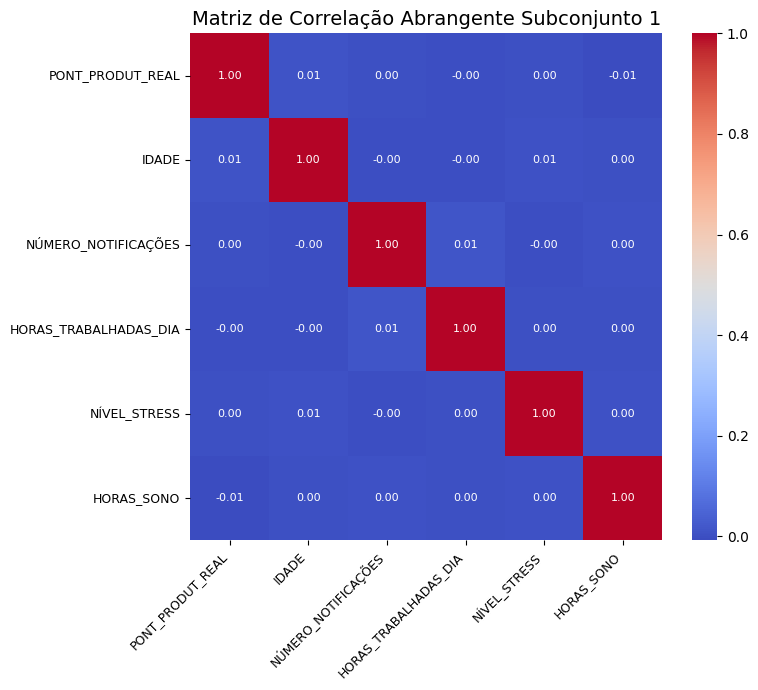

In [ ]:
target_col = 'PONT_PRODUT_REAL'

# Definindo o primeiro subconjunto de variáveis
subset_cols_1 = [
    'IDADE',
    'NÚMERO_NOTIFICAÇÕES',
    'HORAS_TRABALHADAS_DIA',
    'NÍVEL_STRESS',
    'HORAS_SONO'
]

# Adicionando a variável alvo ao início do subconjunto para facilitar a leitura
# da linha/coluna de correlação
plot_cols_1 = [target_col] + subset_cols_1

# Filtrando as colunas que existem no DataFrame
plot_cols_1_filtered = [col for col in plot_cols_1 if col\
                       in social_media.columns]

matriz_correlacao_subset_1 = social_media[plot_cols_1_filtered].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(
    matriz_correlacao_subset_1,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"fontsize": 8})
plt.title('Matriz de Correlação Abrangente Subconjunto 1', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

A análise da Matriz de Correlação (Subconjunto 1) mostra que as variáveis IDADE, NÚMERO_NOTIFICAÇÕES, HORAS_TRABALHADAS_DIA, NÍVEL_STRESS e HORAS_SONO não apresentam correlação linear significativa com a PONT_PRODUT_REAL, exibindo coeficientes próximos a zero. Este resultado sugere que tais fatores, analisados de forma linear, não são os principais preditores da produtividade real neste conjunto de dados.

#### Subconjunto 2: HORAS_TELA_ANTES_DORMIR, PAUSA_DURANTE_TRABALHO, APP_FOCO, BEM_ESTAR_DIGITAL, CONSUMO_DIÁRIO_CAFÉ, DIAS_BURNOUT, HORAS_OFFLINE, SATISFAÇÃO_TRABALHO_VIDA

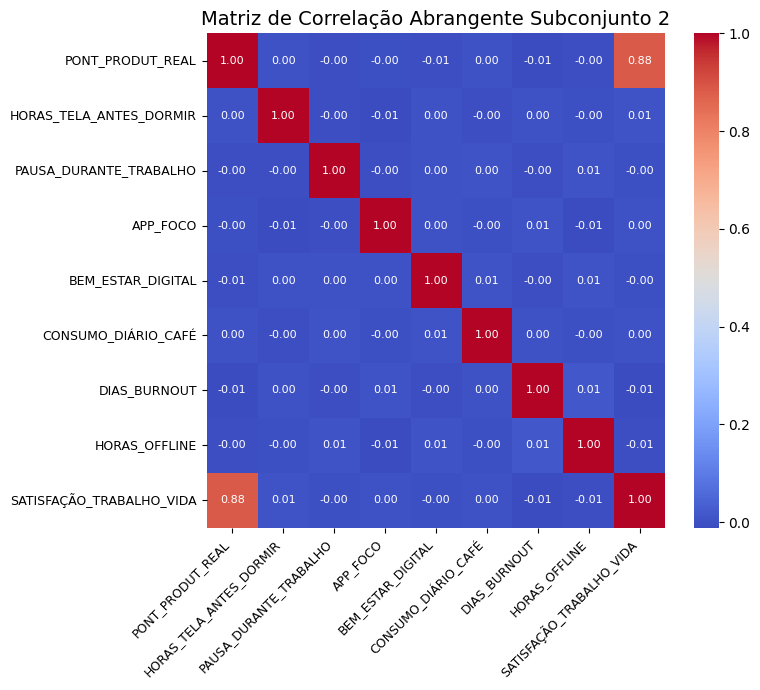

In [ ]:
target_col = 'PONT_PRODUT_REAL'

# Definindo o segundo subconjunto de variáveis
subset_cols_2 = [
    'HORAS_TELA_ANTES_DORMIR',
    'PAUSA_DURANTE_TRABALHO',
    'APP_FOCO',
    'BEM_ESTAR_DIGITAL',
    'CONSUMO_DIÁRIO_CAFÉ',
    'DIAS_BURNOUT',
    'HORAS_OFFLINE',
    'SATISFAÇÃO_TRABALHO_VIDA'
]

# Adicionando a variável alvo ao início do subconjunto para facilitar a leitura
# da linha/coluna de correlação
plot_cols_2 = [target_col] + subset_cols_2

# Filtrando as colunas que existem no DataFrame
plot_cols_2_filtered = [col for col in plot_cols_2 if col\
                       in social_media.columns]

matriz_correlacao_subset_2 = social_media[plot_cols_2_filtered].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(
    matriz_correlacao_subset_2,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"fontsize": 8}
)
plt.title('Matriz de Correlação Abrangente Subconjunto 2', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

A análise da Matriz de Correlação (Subconjunto 2) demonstra que, dentre as variáveis testadas, apenas a SATISFAÇÃO_TRABALHO_VIDA apresentou uma correlação linear forte e positiva, sugerindo uma alta associação com a PONT_PRODUT_REAL.

Para investigar esta associação de forma mais profunda e visual, prosseguiremos com a análise criando um Gráfico de Dispersão (scatter plot) entre estas duas variáveis.

### Matriz de Correlação Abrangente da Produtividade Autoavaliada

Para garantir clareza e evitar qualquer problema de visualização, optamos por dividir a matriz de correlação completa em dois subconjuntos de variáveis.

#### Subconjunto 1: IDADE, NÚMERO_NOTIFICAÇÕES, HORAS_TRABALHADAS_DIA,NÍVEL_STRESS, HORAS_SONO

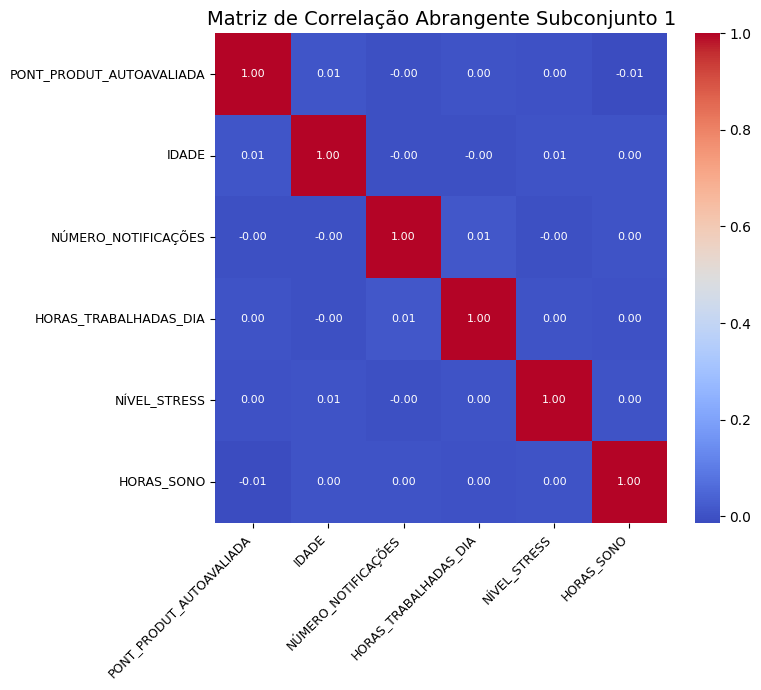

In [ ]:
target_col = 'PONT_PRODUT_AUTOAVALIADA'

# Definindo o primeiro subconjunto de variáveis
subset_cols_1 = [
    'IDADE',
    'NÚMERO_NOTIFICAÇÕES',
    'HORAS_TRABALHADAS_DIA',
    'NÍVEL_STRESS',
    'HORAS_SONO'
]

# Adicionando a variável alvo ao início do subconjunto para facilitar a leitura
# da linha/coluna de correlação
plot_cols_1 = [target_col] + subset_cols_1

# Filtrando as colunas que existem no DataFrame
plot_cols_1_filtered = [col for col in plot_cols_1 if col\
                       in social_media.columns]

matriz_correlacao_subset_1 = social_media[plot_cols_1_filtered].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(
    matriz_correlacao_subset_1,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"fontsize": 8})
plt.title('Matriz de Correlação Abrangente Subconjunto 1', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

A análise da Matriz de Correlação (Subconjunto 1) mostra que as variáveis IDADE, NÚMERO_NOTIFICAÇÕES, HORAS_TRABALHADAS_DIA, NÍVEL_STRESS e HORAS_SONO não apresentam correlação linear significativa com a PONT_PRODUT_AUTOAVALIADA, exibindo coeficientes próximos a zero. Este resultado sugere que tais fatores, analisados de forma linear, não são os principais preditores da produtividade autoavaliada neste conjunto de dados.

#### Subconjunto 2: HORAS_TELA_ANTES_DORMIR, PAUSA_DURANTE_TRABALHO, APP_FOCO, BEM_ESTAR_DIGITAL, CONSUMO_DIÁRIO_CAFÉ, DIAS_BURNOUT, HORAS_OFFLINE, SATISFAÇÃO_TRABALHO_VIDA

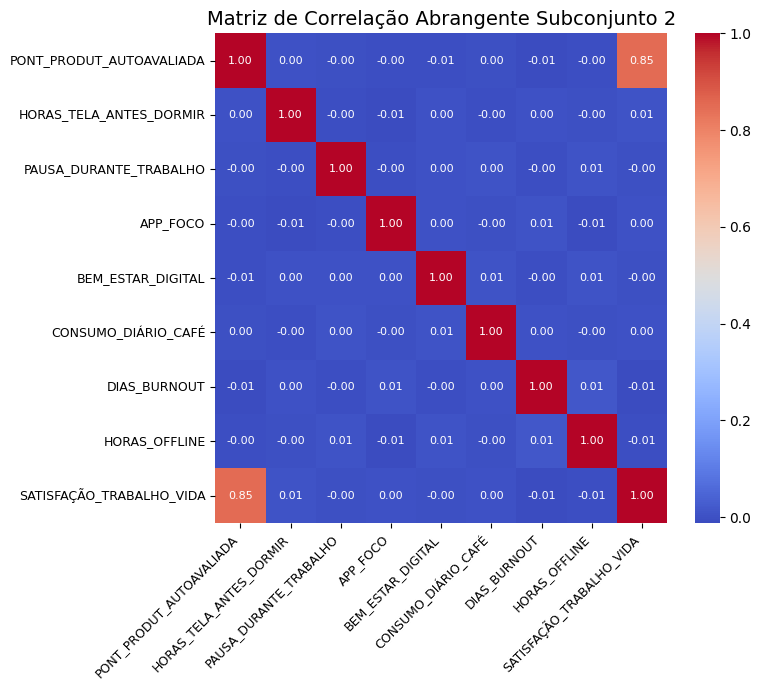

In [ ]:
target_col = 'PONT_PRODUT_AUTOAVALIADA'

# Definindo o segundo subconjunto de variáveis
subset_cols_2 = [
    'HORAS_TELA_ANTES_DORMIR',
    'PAUSA_DURANTE_TRABALHO',
    'APP_FOCO',
    'BEM_ESTAR_DIGITAL',
    'CONSUMO_DIÁRIO_CAFÉ',
    'DIAS_BURNOUT',
    'HORAS_OFFLINE',
    'SATISFAÇÃO_TRABALHO_VIDA'
]

# Adicionando a variável alvo ao início do subconjunto para facilitar a leitura
# da linha/coluna de correlação
plot_cols_2 = [target_col] + subset_cols_2

# Filtrando as colunas que existem no DataFrame
plot_cols_2_filtered = [col for col in plot_cols_2 if col\
                       in social_media.columns]

matriz_correlacao_subset_2 = social_media[plot_cols_2_filtered].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(
    matriz_correlacao_subset_2,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"fontsize": 8}
)
plt.title('Matriz de Correlação Abrangente Subconjunto 2', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

A análise da Matriz de Correlação (Subconjunto 2) demonstra que, dentre as variáveis testadas, apenas a SATISFAÇÃO_TRABALHO_VIDA apresentou uma correlação linear forte e positiva, sugerindo uma alta associação com a PONT_PRODUT_AUTOAVALIADA.

Para investigar esta associação de forma mais profunda e visual, prosseguiremos com a análise criando um Gráfico de Dispersão (scatter plot) entre estas duas variáveis.

## Gráfico de Dispersão: Satisfação Trabalho-Vida vs. Produtividade Real e Autoavaliada

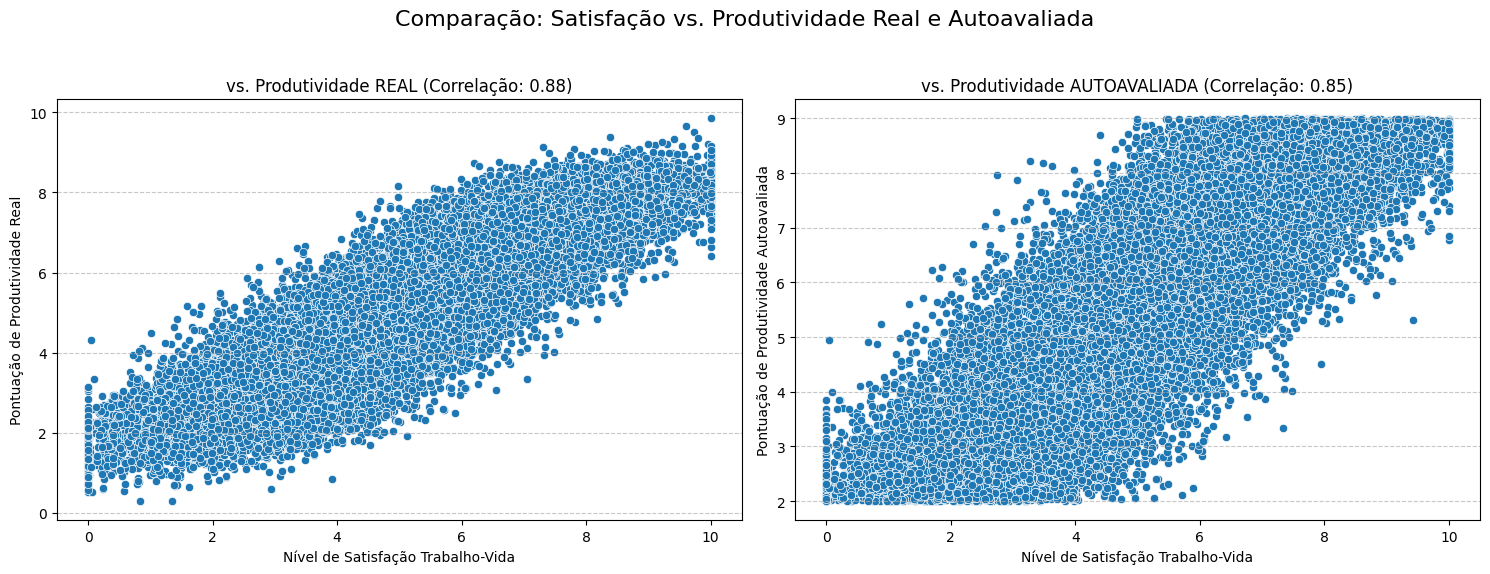

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle(
    'Comparação: Satisfação vs. Produtividade Real e Autoavaliada',
    fontsize=16
)

# Gráfico 1: Produtividade Real
sns.scatterplot(
    x=social_media['SATISFAÇÃO_TRABALHO_VIDA'],
    y=social_media['PONT_PRODUT_REAL'],
    ax=axes[0]  # Especifica que este gráfico vai no primeiro espaço (esquerda)
)
axes[0].set_title('vs. Produtividade REAL (Correlação: 0.88)', fontsize=12)
axes[0].set_xlabel('Nível de Satisfação Trabalho-Vida')
axes[0].set_ylabel('Pontuação de Produtividade Real')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


# Gráfico 2: Produtividade Autoavaliada
sns.scatterplot(
    x=social_media['SATISFAÇÃO_TRABALHO_VIDA'],
    y=social_media['PONT_PRODUT_AUTOAVALIADA'],
    ax=axes[1]  # Especifica que este gráfico vai no segundo espaço (direita)
)
axes[1].set_title(
    'vs. Produtividade AUTOAVALIADA (Correlação: 0.85)',
    fontsize=12,
)
axes[1].set_xlabel('Nível de Satisfação Trabalho-Vida')
axes[1].set_ylabel('Pontuação de Produtividade Autoavaliada')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


# Ajustando o layout para evitar sobreposição e mostrando a figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

A análise comparativa dos gráficos de dispersão confirma que a Satisfação Trabalho-Vida possui forte correlação positiva com ambas as medidas de produtividade: a real (0.88) e a autoavaliada (0.85). Embora semelhantes, a correlação com a produtividade real é ligeiramente mais forte. Podemos notar que o gráfico da autoavaliação exibe um "piso" em torno do valor 2,  que sugere um viés onde os participantes evitam se atribuir notas de produtividade extremamente baixas.

# Pré-Processamento de Dados

O objetivo do Pré-Processamento de Dados é preparar os dados para um modelo de Machine Learning, transformando-os em dados limpos e consistentes.

Para os propósitos deste estudo, a variável a ser prevista (y) é a PONT_PRODUT_REAL. Todas as outras variáveis relevantes serão consideradas como features (X), que servirão de entrada para o modelo.

## Separação dos dados entre treino e teste

In [ ]:
# Definindo a variável alvo (y) e as variáveis independentes (X)
target_variable = 'PONT_PRODUT_REAL'
# X são todas as colunas, exceto a variável alvo
X = social_media.drop(columns=[target_variable])
# y é a variável alvo
y = social_media[target_variable]

print(f"\nVariável Alvo (y): '{target_variable}'")
print(f"Número de Variáveis Independentes (X): {X.shape[1]}")
print(f"Número total de amostras: {social_media.shape[0]}")

# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2,\
random_state=42)

print(f"\nDimensões de X_treino: {X_treino.shape}")
print(f"Dimensões de X_teste: {X_teste.shape}")
print(f"Dimensões de y_treino: {y_treino.shape}")
print(f"Dimensões de y_teste: {y_teste.shape}")

# Criando uma cópia de segurança
X_treino_original = X_treino.copy()


Variável Alvo (y): 'PONT_PRODUT_REAL'
Número de Variáveis Independentes (X): 19
Número total de amostras: 30000

Dimensões de X_treino: (24000, 19)
Dimensões de X_teste: (6000, 19)
Dimensões de y_treino: (24000,)
Dimensões de y_teste: (6000,)


## Análise Visual de Outliers no Conjunto de Treino

Nessa etapa vamos analisar a distribuição e os possíveis outliers em cada variável numérica de forma isolada.

### Análise com Boxplots

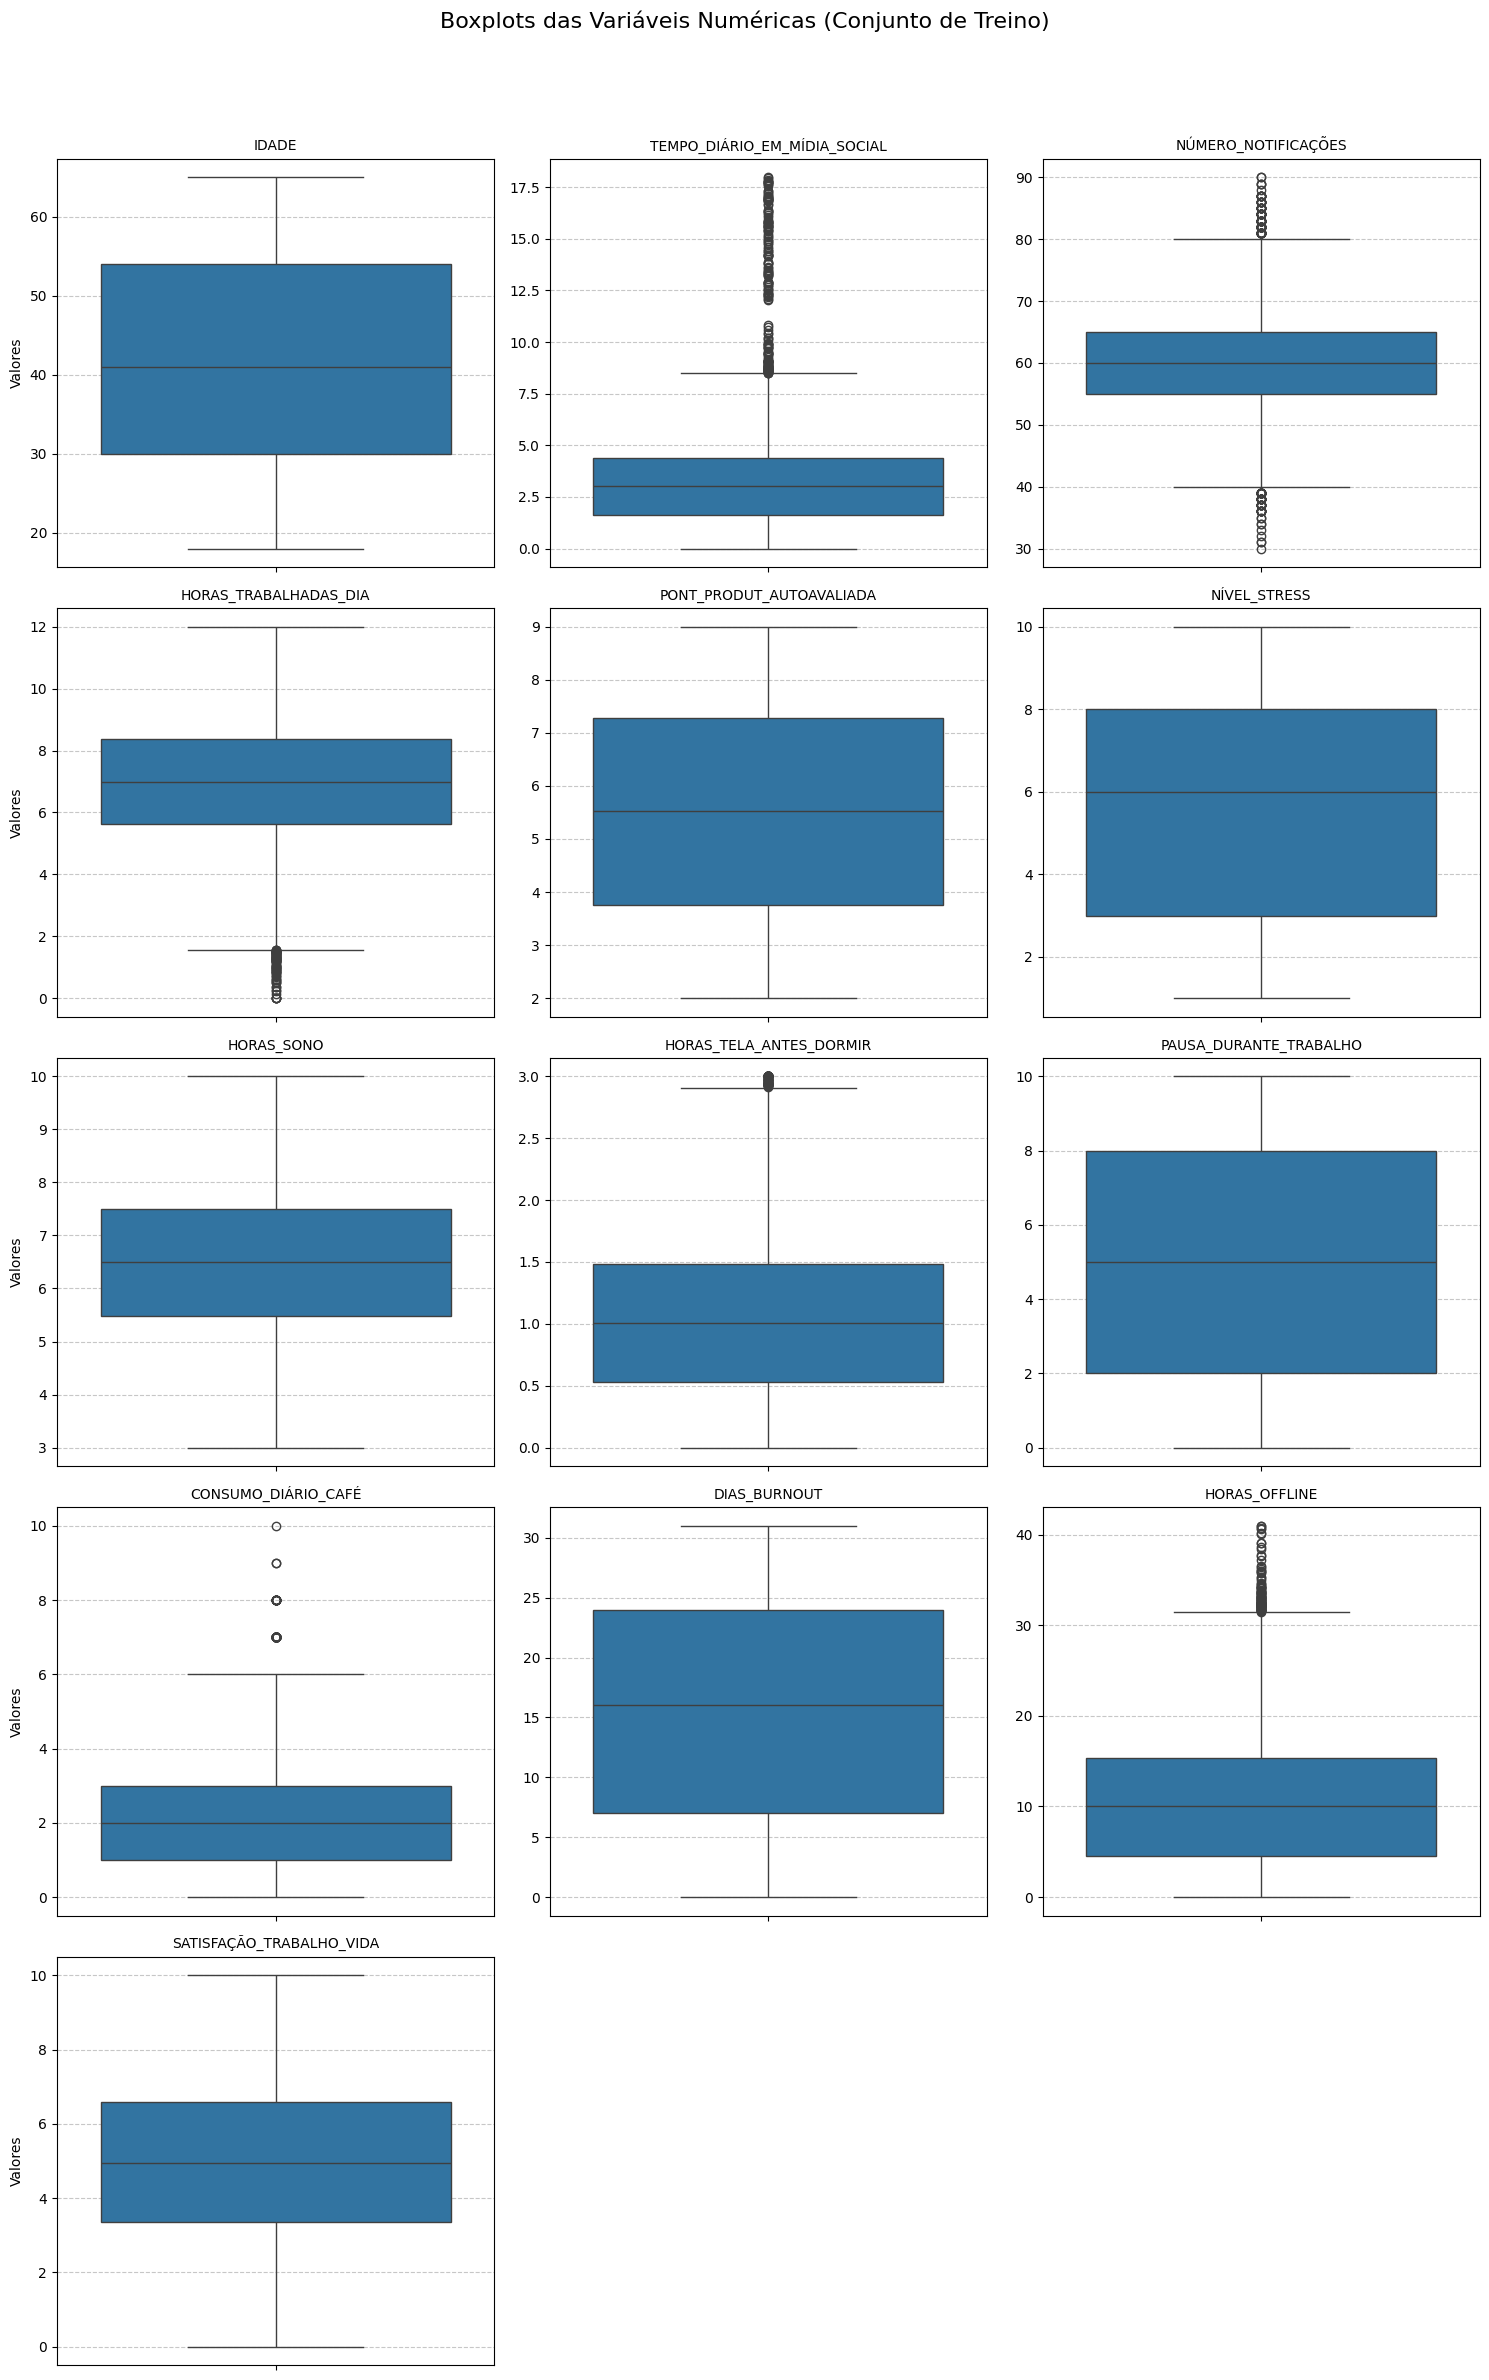

In [ ]:
# Selecionando apenas as colunas numéricas de X_treino
colunas_numericas_x_treino = (
    X_treino.select_dtypes(include=np.number)
    .columns
    .tolist()
)

if not colunas_numericas_x_treino:
    print(
    "\nNão foram encontradas colunas numéricas em X_treino "
    "para gerar boxplots."
)
else:
    # Configuração da Grade de Gráficos
    num_plots = len(colunas_numericas_x_treino)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Calculando as dimensões da figura
    fig_width = num_cols * 5
    fig_height = num_rows * 5

    # Criando a figura e os eixos dos subplots
    fig, axes = plt.subplots(
    nrows=num_rows,
    ncols=num_cols,
    figsize=(fig_width, fig_height),
)
    axes = axes.flatten()

    # Loop para plotar cada Boxplot
    for i, col in enumerate(colunas_numericas_x_treino):
        sns.boxplot(y=X_treino[col], ax=axes[i])
        axes[i].set_title(f'{col}', fontsize=10)

        # Deixa o label 'Valores' apenas nos gráficos da primeira coluna
        if i % num_cols == 0:
            axes[i].set_ylabel('Valores')
        else:
            axes[i].set_ylabel('')

        # Adiciona o grid horizontal para consistência visual
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Limpeza e Ajustes Finais ---
    # Remove subplots vazios, se houver
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adiciona um título geral consistente
    fig.suptitle(
        'Boxplots das Variáveis Numéricas (Conjunto de Treino)',
        fontsize=16,
        y=0.98
    )

    # Ajusta o layout geral da figura
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

A análise dos boxplots mostrou a presença de outliers em diversas variáveis, dentre elas CONSUMO_DIÁRIO_CAFÉ, HORAS_TELA_ANTES_DORMIR e NÚMERO_NOTIFICAÇÕES.

Considerando que estes outliers provavelmente representam observações válidas e não erros de registro, a exclusão desses dados poderia levar à perda de informação relevante. Com isso, fica evidente a necessidade de uma estratégia de tratamento para mitigar a influência desproporcional desses pontos antes da modelagem.

Antes de definir a abordagem final para o tratamento, prosseguiremos com a investigação de outliers na relação entre as variáveis mais importantes para essa análise utilizando o Gráfico de Dispersão (Scatter Plot)

A análise visual por meio de boxplots e do gráfico de dispersão confirmou a presença de outliers no conjunto de treino. Constatamos a existência tanto de valores extremos em variáveis individuais quanto de pontos que se desviam da relação principal dessa análise. Diante disso, torna-se clara a necessidade de uma etapa de tratamento para mitigar a influência desses pontos, a qual será detalhada a seguir.

## Tratamento de Outliers com a Técnica de Capping

A análise visual dos dados de treino, usando tanto boxplots quanto o gráfico de dispersão, mostrou a existência de outliers. Os boxplots mostraram pontos fora da curva em variáveis individuais, como CONSUMO_DIÁRIO_CAFÉ e NÚMERO_NOTIFICAÇÕES. Além disso, o gráfico de dispersão também apontou outliers na relação entre SATISFAÇÃO_TRABALHO_VIDA e PONT_PRODUT_REAL, que são os pontos que ficam nas bordas do padrão principal.

Considerando que estes pontos extremos provavelmente representam observações válidas e não erros de registro, a sua exclusão não é recomendada para não haver perda de informação. Portanto, para mitigar a influência desproporcional destes valores na etapa de modelagem, optamos por utilizar a técnica Capping para ajustar os valores que ultrapassam um determinado limite e substituí-los pelo valor do próprio limite, preservando assim, a integridade de todas as observações.

In [ ]:
# Colunas que contêm outliers
colunas_capping = [
    'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL',
    'NÚMERO_NOTIFICAÇÕES',
    'HORAS_TRABALHADAS_DIA',
    'HORAS_TELA_ANTES_DORMIR',
    'CONSUMO_DIÁRIO_CAFÉ',
    'HORAS_OFFLINE',
]

print(f"Iniciando Capping para {len(colunas_capping)} colunas...\n")

# Loop que passa por cada coluna da lista
for coluna in colunas_capping:
    # Calcula os limites (percentis 1 e 99) usando apenas X_treino
    limite_inferior = X_treino[coluna].quantile(0.01)
    limite_superior = X_treino[coluna].quantile(0.99)

    print(f"Processando coluna: '{coluna}'")
    print(f"Limite Inferior: {limite_inferior:.2f}")
    print(f"Limite Superior: {limite_superior:.2f}")

    # Aplica o capping em TREINO e TESTE usando os limites do treino
    X_treino[coluna] = X_treino[coluna].clip(
        lower=limite_inferior,
        upper=limite_superior,
    )
    X_teste[coluna] = X_teste[coluna].clip(
        lower=limite_inferior,
        upper=limite_superior,
    )

Iniciando Capping para 6 colunas...

Processando coluna: 'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL'
Limite Inferior: 0.00
Limite Superior: 8.12
Processando coluna: 'NÚMERO_NOTIFICAÇÕES'
Limite Inferior: 43.00
Limite Superior: 79.00
Processando coluna: 'HORAS_TRABALHADAS_DIA'
Limite Inferior: 2.27
Limite Superior: 11.61
Processando coluna: 'HORAS_TELA_ANTES_DORMIR'
Limite Inferior: 0.00
Limite Superior: 2.67
Processando coluna: 'CONSUMO_DIÁRIO_CAFÉ'
Limite Inferior: 0.00
Limite Superior: 6.00
Processando coluna: 'HORAS_OFFLINE'
Limite Inferior: 0.00
Limite Superior: 28.63


## Verificação do Tratamento de Outliers: Análise Comparativa com Boxplots

Para validar a eficácia da técnica de Capping aplicada, apresentamos boxplots comparativos para as variáveis que foram tratadas, exibindo a distribuição dos dados antes e depois do ajuste.

Iniciando verificação visual do Capping...


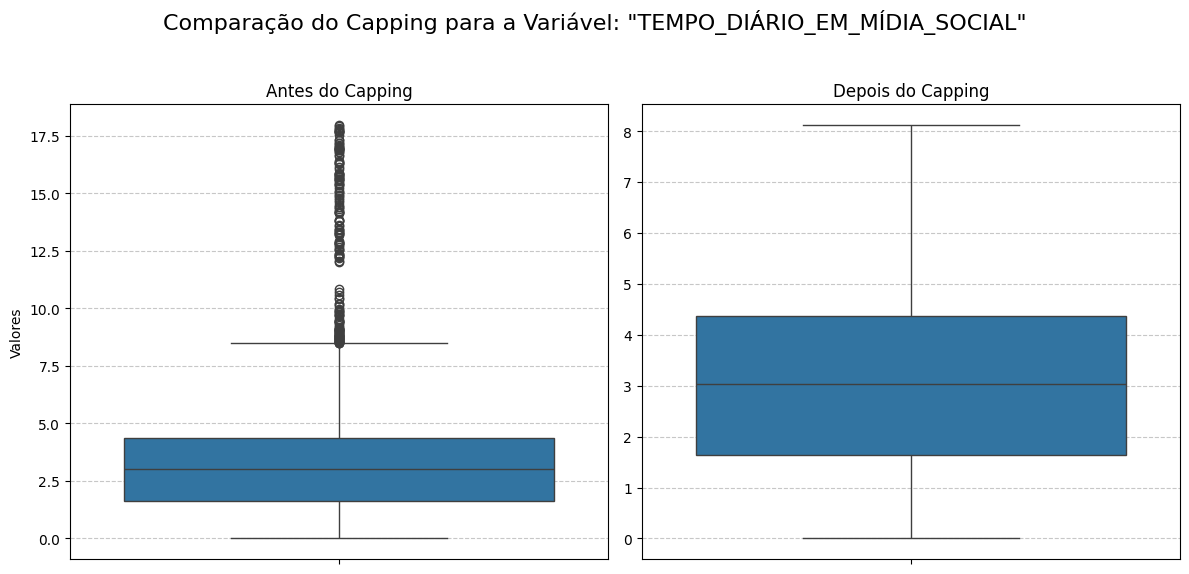

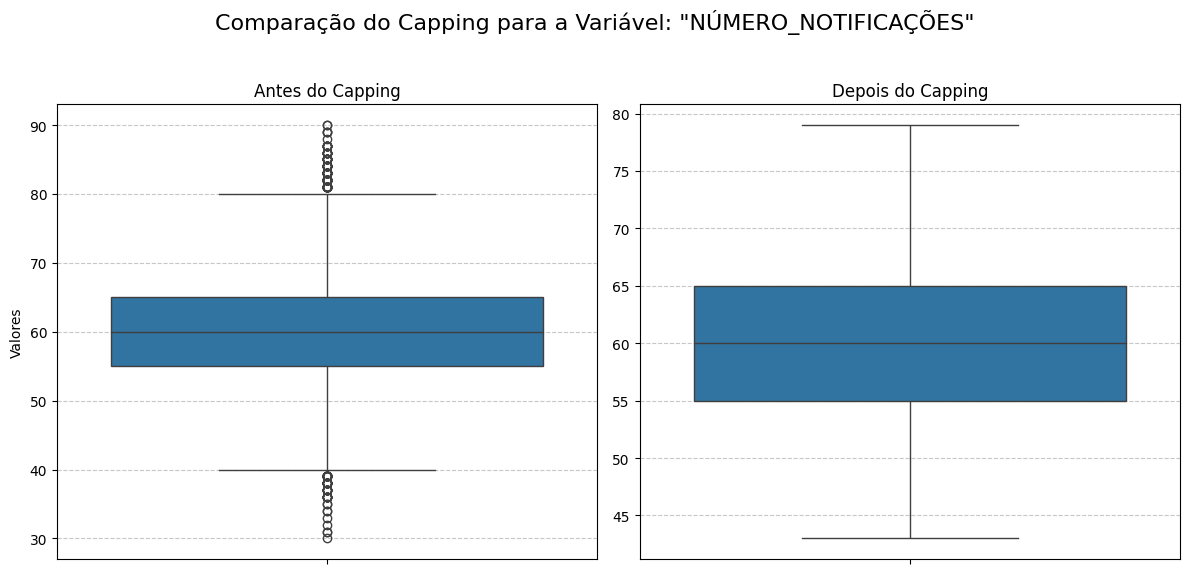

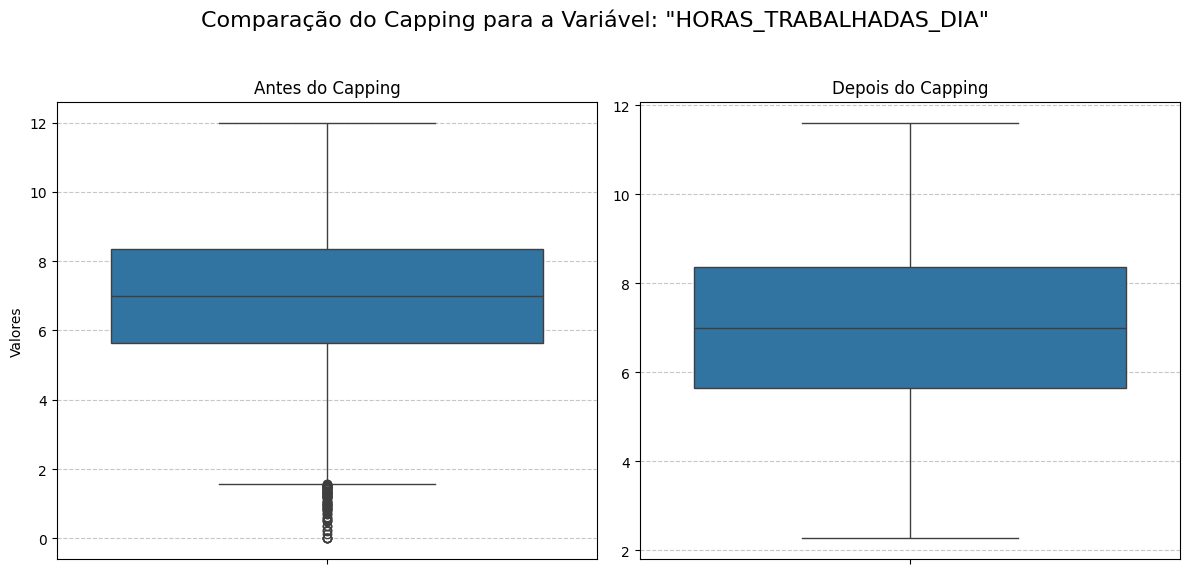

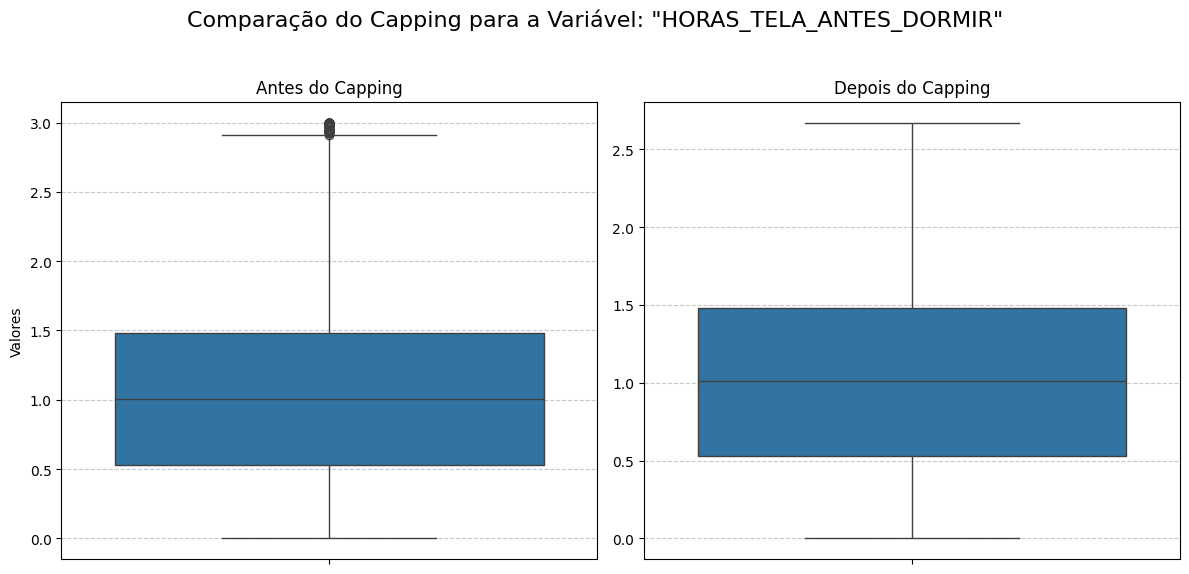

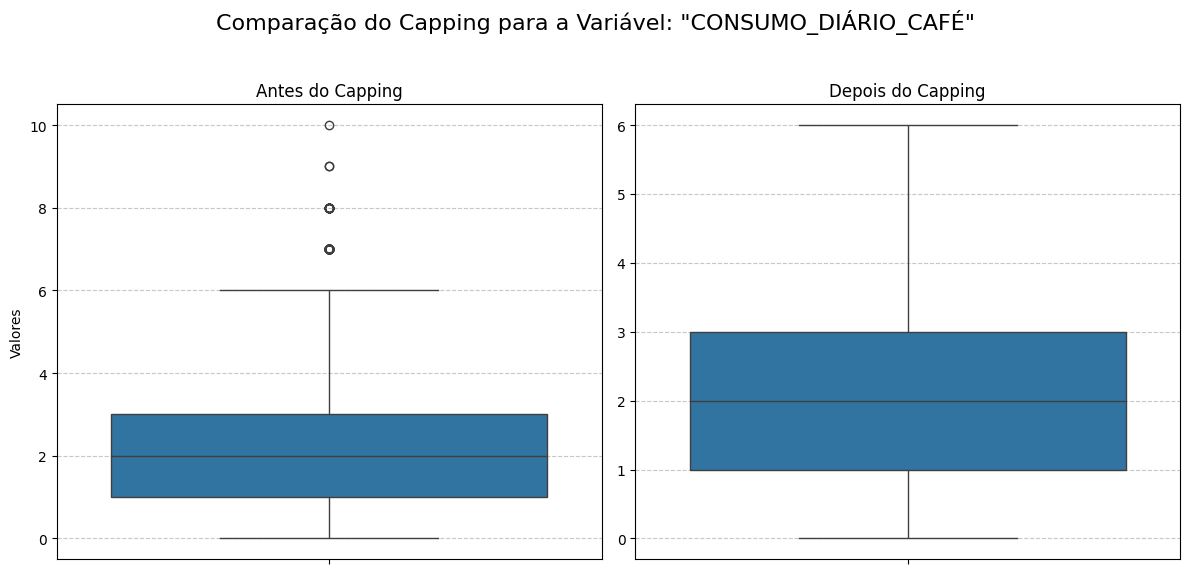

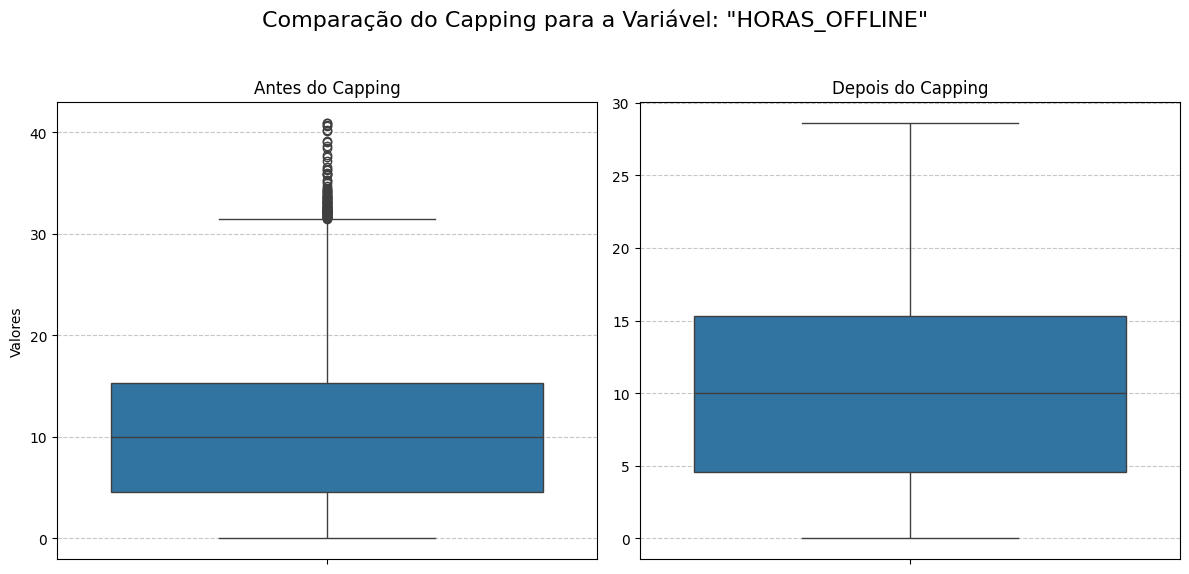

In [ ]:
# Colunas que continham outliers
colunas_para_capping = [
    'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL',
    'NÚMERO_NOTIFICAÇÕES',
    'HORAS_TRABALHADAS_DIA',
    'HORAS_TELA_ANTES_DORMIR',
    'CONSUMO_DIÁRIO_CAFÉ',
    'HORAS_OFFLINE'
]

print("Iniciando verificação visual do Capping...")

# Loop para criar um gráfico de comparação para cada coluna da lista
for coluna in colunas_para_capping:

    # Cria uma figura com dois subplots (um ao lado do outro)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Adiciona um título para a imagem desta coluna
    fig.suptitle(
        f'Comparação do Capping para a Variável: "{coluna}"',
        fontsize=16,
        y=0.98,
    )

    # Gráfico da Esquerda: ANTES
    sns.boxplot(y=X_treino_original[coluna], ax=axes[0])
    axes[0].set_title('Antes do Capping')
    axes[0].set_ylabel('Valores')
    # # Adiciona o grid horizontal para consistência visual
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Gráfico da Direita: DEPOIS
    sns.boxplot(y=X_treino[coluna], ax=axes[1])
    axes[1].set_title('Depois do Capping')
    axes[1].set_ylabel('')
    # Adiciona o grid horizontal para consistência visual
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Exibe o par de gráficos para esta coluna antes de ir para a próxima
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Na análise dos gráficos 'Depois do Capping', é possível observar que os pontos que anteriormente eram classificados como outliers foram reajustados, agora contidos dentro dos novos limites superior e inferior dos 'bigodes' do boxplot.

Isso confirma que o tratamento foi bem-sucedido em mitigar a influência dos valores extremos sem a necessidade de remover dados.

## Análise de Valores Ausentes

Antes de prosseguir com as próximas etapas de pré-processamento, verificaremos a integridade do conjunto de dados em relação a valores ausentes (NaNs).

Executaremos um comando para inspecionar o conjunto de treino (X_treino) e quantificar o total de valores nulos em cada coluna, a fim de identificar a necessidade e a melhor estratégia para o tratamento.

In [ ]:
# Contando os valores nulos em cada coluna do conjunto de treino
contagem_nulos = X_treino.isnull().sum()

# Mostrando apenas as colunas que têm valores nulos
print("Verificando valores ausentes em X_treino:")
print(contagem_nulos[contagem_nulos > 0])

Verificando valores ausentes em X_treino:
TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL    2231
PONT_PRODUT_AUTOAVALIADA        1284
NÍVEL_STRESS                    1528
HORAS_SONO                      2107
HORAS_TELA_ANTES_DORMIR         1759
SATISFAÇÃO_TRABALHO_VIDA        2196
dtype: int64


A análise mostrou que temos um número bem significativo de valores NaN em 6 colunas importantes, sendo todas elas numéricas.

## Tratamento de Valores Ausentes por Imputação

A análise anterior identificou a presença de valores ausentes (NaNs). Para tratá-los optamos por utilizar a imputação de valores pela mediana, calculada a partir do conjunto de treino. Usamos a mediana (em vez da média) porque ela é menos sensível a valores extremos, sendo uma escolha mais robusta mesmo após o tratamento de outliers.

In [ ]:
# Colunas identificadas com NaNs
colunas_com_nans = [
    'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL',
    'PONT_PRODUT_AUTOAVALIADA',
    'NÍVEL_STRESS',
    'HORAS_SONO',
    'HORAS_TELA_ANTES_DORMIR',
    'SATISFAÇÃO_TRABALHO_VIDA',
]

# Criando o objeto imputer com a estratégia da mediana
imputer = SimpleImputer(strategy='median')

# Aprendendo as medianas do conjunto de treino e aplicando-as
X_treino[colunas_com_nans] = imputer.fit_transform(
    X_treino[colunas_com_nans]
)

# Aplicando as mesmas medianas no conjunto de teste
X_teste[colunas_com_nans] = imputer.transform(
    X_teste[colunas_com_nans]
)

## Verificação do Tratamento de Valores Ausentes por Imputação

Para validar a eficácia da técnica de imputação aplicada, utilizaremos um comando que busca por valores ausentes.

In [ ]:
# Verificando as colunas tratadas no conjunto de treino
print("Verificando o resultado da imputação em X_treino:")
print(X_treino[colunas_com_nans].isnull().sum())

print("\n" + "-"*40 + "\n")

# Verificando as colunas tratadas no conjunto de teste
print("Verificando o resultado da imputação em X_teste:")
print(X_teste[colunas_com_nans].isnull().sum())

Verificando o resultado da imputação em X_treino:
TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL    0
PONT_PRODUT_AUTOAVALIADA        0
NÍVEL_STRESS                    0
HORAS_SONO                      0
HORAS_TELA_ANTES_DORMIR         0
SATISFAÇÃO_TRABALHO_VIDA        0
dtype: int64

----------------------------------------

Verificando o resultado da imputação em X_teste:
TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL    0
PONT_PRODUT_AUTOAVALIADA        0
NÍVEL_STRESS                    0
HORAS_SONO                      0
HORAS_TELA_ANTES_DORMIR         0
SATISFAÇÃO_TRABALHO_VIDA        0
dtype: int64


A análise do resultado acima, confirma que não há mais valores ausentes nas colunas tratadas. Todas as colunas agora apresentam uma contagem de 0 valores nulos, indicando que a estratégia de preenchimento pela mediana foi bem-sucedida.

## Codificação de Variáveis Categóricas (Encoding)

As colunas de texto (GÊNERO, TIPO_EMPREGO_STATUS, REDE_SOCIAL_PREFERÊNCIA) precisam ser convertidas para um formato numérico. Escolhemos a técnica de One-Hot Encoding por ser a mais adequada para variáveis sem ordem natural, transformando cada categoria em uma nova coluna binária (0 ou 1).

In [ ]:
print("Formato original de X_treino:", X_treino.shape)
print("Formato original de X_teste:", X_teste.shape)

# Aplicando o One-Hot Encoding em treino e teste
# Codificando somente as colunas que são de texto
X_treino = pd.get_dummies(X_treino)
X_teste = pd.get_dummies(X_teste)

# Alinhamento de colunas
# Pega as colunas do treino como a "versão oficial"
colunas_treino = X_treino.columns

# Reindexando o teste para garantir que ele tenha exatamente as mesmas
# colunas que o treino, na mesma ordem
# O Preenchendo com 0 qualquer coluna que exista no treino mas não no teste
X_teste = X_teste.reindex(columns=colunas_treino, fill_value=0)

print("\nOne-Hot Encoding aplicado e colunas alinhadas com sucesso!")
print("Novo formato de X_treino:", X_treino.shape)
print("Novo formato de X_teste:", X_teste.shape)

Formato original de X_treino: (24000, 19)
Formato original de X_teste: (6000, 19)

One-Hot Encoding aplicado e colunas alinhadas com sucesso!
Novo formato de X_treino: (24000, 34)
Novo formato de X_teste: (6000, 34)


A técnica de One-Hot Encoding foi aplicada com sucesso, transformando as variáveis categóricas em formato numérico. Conforme resultado acima, o número de colunas nos conjuntos de treino e teste aumentou de 18 para 29. O aumento do número de colunas se deve ao fato do One-Hot Encoding ter substituído cada coluna de texto por múltiplas colunas novas, onde cada uma representa uma das categorias únicas da coluna original.

## Padronização das Variáveis Numéricas

Como etapa final do pré-processamento, as colunas numéricas serão escalonadas para garantir que todas tenham a mesma ordem de grandeza, evitando que variáveis de maior escala dominem o modelo. Para isso, será utilizada a técnica de Padronização que transforma os dados de modo que cada coluna numérica tenha uma média de 0 e um desvio padrão de 1.

In [ ]:
# Identificando as colunas a serem escalonadas
colunas_para_escalonar = [
    'IDADE',
    'TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL',
    'NÚMERO_NOTIFICAÇÕES',
    'HORAS_TRABALHADAS_DIA',
    'PONT_PRODUT_AUTOAVALIADA',
    'NÍVEL_STRESS',
    'HORAS_SONO',
    'HORAS_TELA_ANTES_DORMIR',
    'PAUSA_DURANTE_TRABALHO',
    'CONSUMO_DIÁRIO_CAFÉ',
    'DIAS_BURNOUT',
    'HORAS_OFFLINE',
    'SATISFAÇÃO_TRABALHO_VIDA',
]

# Verificando as colunas
colunas_existentes = []
for col in colunas_para_escalonar:
    if col in X_treino.columns:
        colunas_existentes.append(col)

scaler = StandardScaler()

# Aprendendo a média e o desvio padrão do treino e aplicando a transformação
X_treino[colunas_existentes] = scaler.fit_transform(
    X_treino[colunas_existentes]
)

# Aplicando a mesma transformação no conjunto de teste
X_teste[colunas_existentes] = scaler.transform(
    X_teste[colunas_existentes]
)

## Verificação da Padronização das Variáveis Numéricas

Para validar que a Padronização foi aplicada corretamente, utilizaremos um comando para calcular e exibir as estatísticas descritivas para as colunas numéricas que foram escalonadas no conjunto de treino. O resultado esperado é que a média de cada coluna seja um valor muito próximo de 0 e o desvio padrão seja muito próximo de 1.

In [ ]:
# Usando .describe() para ver as estatísticas e .loc[] para filtrar
# apenas as linhas que nos interessam: a média (mean) e o desvio padrão (std)
estatisticas_verificacao = (
    X_treino[colunas_existentes]
    .describe()
    .loc[['mean', 'std']]
)

estatisticas_verificacao

,IDADE,TEMPO_DIÁRIO_EM_MÍDIA_SOCIAL,NÚMERO_NOTIFICAÇÕES,HORAS_TRABALHADAS_DIA,PONT_PRODUT_AUTOAVALIADA,NÍVEL_STRESS,HORAS_SONO,HORAS_TELA_ANTES_DORMIR,PAUSA_DURANTE_TRABALHO,CONSUMO_DIÁRIO_CAFÉ,DIAS_BURNOUT,HORAS_OFFLINE,SATISFAÇÃO_TRABALHO_VIDA
mean,-1.918465e-16,4.026409e-17,-2.149392e-16,1.657933e-16,-1.338189e-16,-1.052491e-16,-4.088581e-16,-4.588922e-17,-5.921189e-17,-6.676141e-17,6.661338e-17,-2.029488e-16,2.673417e-16
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00


A tabela de estatísticas descritivas confirma que a Padronização foi finalizada com sucesso. Conforme esperado, todas as variáveis numéricas tratadas no conjunto de treino agora apresentam uma média efetivamente nula e um desvio padrão igual a 1. Com a conclusão de todas as etapas de tratamento de outliers, valores ausentes, codificação e escalonamento, o conjunto de dados está agora devidamente preparado e otimizado para a fase de modelagem de machine learning.

# Conclusão

O presente estudo foi iniciado com o objetivo de investigar a relação entre o tempo de uso de mídias sociais e a possível discrepância entre a produtividade autoavaliada e a produtividade real. Uma análise exploratória inicial não revelou correlações diretas e claras, o que motivou uma investigação mais ampla das relações entre todas as variáveis do conjunto de dados original.

A principal descoberta desta análise exploratória, realizada nos dados brutos, foi uma correlação positiva e forte entre a 'Satisfação Trabalho-Vida' e ambas as medidas de produtividade: a real (coeficiente de 0.88) e a autoavaliada (coeficiente de 0.85). A análise também demonstrou uma ausência de correlação linear significativa entre a produtividade e outras variáveis como NÍVEL_STRESS e HORAS_SONO.

A principal conclusão deste estudo é que, para a população estudada, o bem-estar e o equilíbrio entre a vida pessoal e profissional são mais determinantes para a produtividade do que os hábitos de trabalho ou o uso de tecnologia isoladamente.

A sutil diferença entre os coeficientes de correlação (0.88 para a real vs. 0.85 para a autoavaliada), juntamente com a observação de um "piso" nos dados de autoavaliação, sugere que, embora a satisfação impulsione massivamente a autopercepção de performance, sua conexão com a produtividade real é ainda mais direta e pronunciada. Isso indica um possível viés de desejabilidade social na autoavaliação, em outras palavras, as pessoas geralmente evitam se dar uma nota de produtividade muito baixa, mesmo quando sua produtividade real não foi alta.

Isso implica que estratégias focadas em aumentar a produtividade podem obter mais sucesso ao priorizar o bem-estar e a satisfação geral dos indivíduos, em vez de focar apenas em métricas de performance ou na gestão do tempo de tela.